This is the project colab submission for CAI1C03 - it attempts to build a deep learning model for CIFAR-10 and is to be used over google colab.
This model builds on basic CNN blocks.
This a series of progress of continuously adding / mofidying the model to get from a basic accuracyo to improved accuracy 

The dataset can be retrieved from https://www.cs.toronto.edu/~kriz/cifar.html

# START PREPROCESSING - GETTING DATA FROM GOOGLE DRIVE
Make sure the google drive has this setup <br/>
My Drive \ CAI1C03 \ data \ cifar-10-batches-py
cifar-10-batches-py is the directory that holds all the pickle files from
https://www.cs.toronto.edu/~kriz/cifar.html


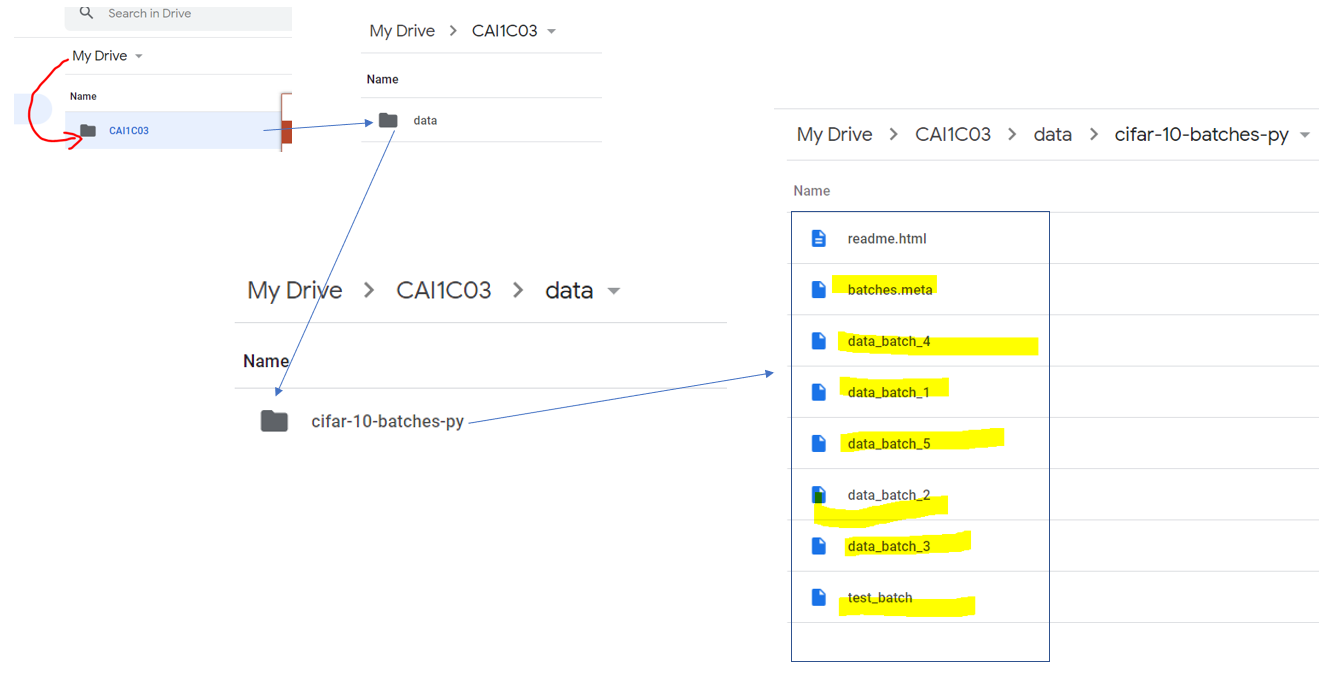

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/CAI1C03/data"

cifar-10-batches-py  XXX.txt


The following is a symbolic link from googledrive to virtual env. We will be storing our files in the virtual env.

In [3]:
!ln -s "/content/drive/MyDrive/CAI1C03/data" "/content/dataForProj"

In [4]:
!ls -al "/content/dataForProj"

lrwxrwxrwx 1 root root 35 Dec  4 07:07 /content/dataForProj -> /content/drive/MyDrive/CAI1C03/data


In [ ]:
#this folows articles from https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
cifar10_dataset_folder_path='/content/dataForProj/' + 'cifar-10-batches-py'

In [8]:
cifar10_dataset_folder_path

'/content/dataForProj/cifar-10-batches-py'

In [9]:
def load_cfar10_batch_noBatchID_trainingDataAfterNormalization (cifar10_dataset_folder_path):
    with open(cifar10_dataset_folder_path, mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [10]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [11]:
def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    
    print (label_counts)

    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)


Stats of batch #3:
# of Samples: 10000

<class 'numpy.ndarray'>
<class 'list'>
{0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 7000:
Image - Min Value: 24 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


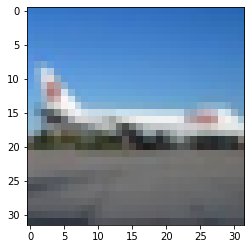

In [12]:
batch_id = 3 
sample_id = 7000 

features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)



print('\nStats of batch #{}:'.format(batch_id))
print('# of Samples: {}\n'.format(len(features)))

label_names = load_label_names()
label_counts = dict(zip(*np.unique(labels, return_counts=True)))
print (type(features))
print (type(labels))
print (label_counts)

for key, value in label_counts.items():
    print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))

sample_image = features[sample_id]
sample_label = labels[sample_id]

print('\nExample of Image {}:'.format(sample_id))
print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
print('Image - Shape: {}'.format(sample_image.shape))
print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))

plt.imshow(sample_image)


Stats of batch #3:
# of Samples: 10000

{0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 7000:
Image - Min Value: 24 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


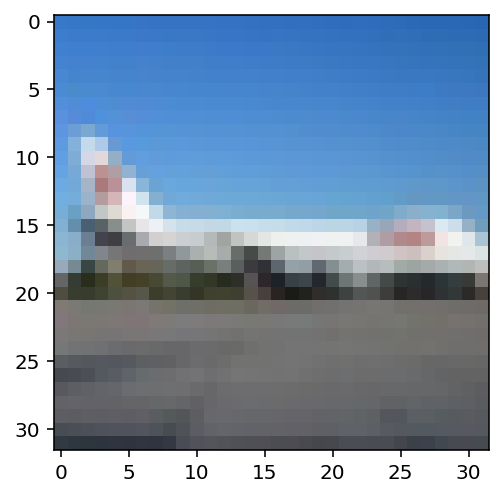

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Explore the dataset
batch_id = 3
sample_id = 7000
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [ ]:
#Let's normalize those numbers

In [14]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    #min_val = np.min(x)
    #max_val = np.max(x)
    #x = (x-min_val) / (max_val-min_val)
    x = x / 255.0
    return x

In [15]:
def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    
    return encoded

In [16]:
def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):
    features = normalize(features)
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))

In [17]:
def _preprocess_and_save_notHotEncode (normalize, features, labels, filename):
    features = normalize(features)
    #labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))

In [18]:

def preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode):
    n_batches = 5
    valid_features = []
    valid_labels = []
    print ( 'preprocess_and_save_data....' )

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        
        # find index to be the point as validation data in the whole dataset of the batch (10%)
        index_of_validation = int(len(features) * 0.1)

        # preprocess the 90% of the whole dataset of the batch
        # - normalize the features
        # - one_hot_encode the lables
        # - save in a new file named, "preprocess_batch_" + batch_number
        # - each file for each batch
        print ( 'Type of Labels' , type (  labels[:-index_of_validation] ) )
        print ( 'Shape of Labels' , len(  labels[:-index_of_validation] ) )
        _preprocess_and_save(normalize, one_hot_encode,
                             features[:-index_of_validation], labels[:-index_of_validation], 
                             'preprocess_batch_' + str(batch_i) + '.p')

        # unlike the training dataset, validation dataset will be added through all batch dataset
        # - take 10% of the whold dataset of the batch
        # - add them into a list of
        #   - valid_features
        #   - valid_labels
        valid_features.extend(features[-index_of_validation:])
        valid_labels.extend(labels[-index_of_validation:])

    # preprocess the all stacked validation dataset
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(valid_features), np.array(valid_labels),
                         'preprocess_validation.p')

    # load the test dataset
    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # preprocess the testing data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all testing data
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(test_features), np.array(test_labels),
                         'preprocess_training.p')

In [ ]:
#preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [19]:
def preprocess_and_save_data_novalidation (cifar10_dataset_folder_path, normalize, one_hot_encodeParam ):
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        
        # find index to be the point as validation data in the whole dataset of the batch (10%)
        #index_of_validation = int(len(features) * 0.1)

        # preprocess the 90% of the whole dataset of the batch
        # - normalize the features
        # - one_hot_encode the lables
        # - save in a new file named, "preprocess_batch_" + batch_number
        # - each file for each batch
        #_preprocess_and_save(normalize, one_hot_encode,
        #                     features, labels, 
        #                     'preprocess_batch_' + str(batch_i) + '.p')

        # unlike the training dataset, validation dataset will be added through all batch dataset
        # - take 10% of the whold dataset of the batch
        # - add them into a list of
        #   - valid_features
        #   - valid_labels
        #valid_features.extend(features[-index_of_validation:])
        #valid_labels.extend(labels[-index_of_validation:])
    
    print ('Summary status ')
    allTrainingFeatures = np.array([])
    allTrainingLabels =np.array([])
    appendedFeatures  = np.zeros((0, 32, 32, 3 ))
    appendedLabels =[]

    print (len(appendedFeatures), appendedFeatures.shape)
    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        print ('in loop', type(features), len(features), features.ndim, features.shape)
        print ('in loop', type(labels), len(labels))
        #np.append(allTrainingFeatures, features )
        #np.append(allTrainingLabels, labels )
        #print ( features )
        #a=np.append(allTrainingFeatures, features)
        #a = np.concatenate(a, features)
        appendedFeatures = np.append(appendedFeatures , features, axis = 0) #append on the row-axis = 0 
        #print ( 'allTrainingFeatures len', len( allTrainingFeatures ))
        print ( 'appendedFeatures len', len( appendedFeatures ))
        #appendedLabels.append( np.array(appendedLabels) )
        #appendedLabels = appendedLabels.append( labels )

        appendedLabels.extend(labels) 
        #appendedLabels = np.append( appendedLabels , np.array(labels) , axis = 0) #append on the row-axis = 0 
        #arrLabels = np.array(labels)
 
        # displaying list
        #print ("List: ", lst)
 
        # displaying array
        print ("appendedLabels: ", len(appendedLabels) )

     
    print ( len( appendedFeatures )  , appendedFeatures.shape, appendedFeatures.ndim )
    print ( 'Length of labels after iteration' , len( appendedLabels ) )

    #uncomment afterwards
    if ( bool(one_hot_encodeParam)):
        _preprocess_and_save(normalize, one_hot_encode,
                             appendedFeatures, np.array(appendedLabels) , 
                             'preprocess_batch_train_full_ONE.p')
    else:
        _preprocess_and_save_notHotEncode  (normalize,
                             appendedFeatures, np.array(appendedLabels) , 
                             'preprocess_batch_train_full_noONE.p') 
    
    #_preprocess_and_save(normalize, one_hot_encode,
    #                         appendedFeatures, np.array(appendedLabels) , 
    #                         'preprocess_batch_train_full.p')


    # load the test dataset
    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # preprocess the testing data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all testing data
    #_preprocess_and_save(normalize, one_hot_encode,
    #                     np.array(test_features), np.array(test_labels),
    #                     'preprocess_test.p')
    #_preprocess_and_save_notHotEncode (normalize,
    #                    np.array(test_features), np.array(test_labels),
    #                    'preprocess_test.p')


    if ( bool(one_hot_encodeParam)):
        _preprocess_and_save(normalize, one_hot_encode,
                             np.array(test_features), np.array(test_labels), 
                             'preprocess_test_ONE.p')
    else:
        _preprocess_and_save_notHotEncode  (normalize,
                             np.array(test_features), np.array(test_labels), 
                             'preprocess_test_noONE.p')
                             
    print ('Dump to pickle file completed ')                   

In [20]:
#option not to one-HOT-encode the y in the pickle file instead 
preprocess_and_save_data_novalidation(cifar10_dataset_folder_path, normalize, False)
#shape expected, 50000, 32, 32, 3 

Summary status 
0 (0, 32, 32, 3)
in loop <class 'numpy.ndarray'> 10000 4 (10000, 32, 32, 3)
in loop <class 'list'> 10000
appendedFeatures len 10000
appendedLabels:  10000
in loop <class 'numpy.ndarray'> 10000 4 (10000, 32, 32, 3)
in loop <class 'list'> 10000
appendedFeatures len 20000
appendedLabels:  20000
in loop <class 'numpy.ndarray'> 10000 4 (10000, 32, 32, 3)
in loop <class 'list'> 10000
appendedFeatures len 30000
appendedLabels:  30000
in loop <class 'numpy.ndarray'> 10000 4 (10000, 32, 32, 3)
in loop <class 'list'> 10000
appendedFeatures len 40000
appendedLabels:  40000
in loop <class 'numpy.ndarray'> 10000 4 (10000, 32, 32, 3)
in loop <class 'list'> 10000
appendedFeatures len 50000
appendedLabels:  50000
50000 (50000, 32, 32, 3) 4
Length of labels after iteration 50000
Dump to pickle file completed 


# END START PREPROCESSING - GETTING DATA FROM GOOGLE DRIVE

# START CHECKPOINT FOR PREPROCESSED PRICKLE FILE

In [ ]:
#test Pickle for NON-ONE dump - For TESTING , expected to get 10000

In [21]:
pathTesting = 'preprocess_test_noONE.p'
test_features, test_labels = pickle.load(open( pathTesting , mode='rb')) 
print ( 'test features = ' , type(test_features) , ';shape test labels --> ',test_features.shape ) 
print ( 'test labels = ' , type(test_labels) , ';len(test labels) --> ', len(test_labels) ) 
print ( 'Peek into 1 label-->', test_labels [166])

test features =  <class 'numpy.ndarray'> ;shape test labels -->  (10000, 32, 32, 3)
test labels =  <class 'numpy.ndarray'> ;len(test labels) -->  10000
Peek into 1 label--> 8


In [ ]:
#test Pickle for NON-ONE dump - For TRAINING , expected to get 50000

In [22]:
pathTraining = 'preprocess_batch_train_full_noONE.p'
train_features, train_labels = pickle.load(open('preprocess_batch_train_full_noONE.p', mode='rb')) 
print ( 'train features = ' , type(train_features) , ';shape train labels --> ',train_features.shape ) 
print ( 'train labels = ' , type(train_labels) , ';len(train labels) --> ', len(train_labels) ) 
print ( 'Peek into 1 train label-->', train_labels [166])

train features =  <class 'numpy.ndarray'> ;shape train labels -->  (50000, 32, 32, 3)
train labels =  <class 'numpy.ndarray'> ;len(train labels) -->  50000
Peek into 1 train label--> 9


# END TESTING OF PREPROCESSED PICKLE FILE

# START transform these into numpy arrays to work

In [ ]:
# transform these into numpy arrays to work 


In [23]:
trainX = train_features 
trainy = np.array(train_labels)
testX = test_features
testy = np.array(test_labels)

In [24]:
# If running in local in anaconda , set RUN_LOCAL=TRUE
RUN_LOCAL_MODE = False 
if RUN_LOCAL_MODE == True :
  from keras.datasets import cifar10
  # load dataset
  print ('Local mode--loading from keras directly')
  (trainX, trainy), (testX, testy) = cifar10.load_data()
  trainX = trainX / 255 
  testX = testX / 255 
  # summarize loaded dataset

In [25]:
#expected 50000, 10000
len(trainX) , len(testX)

(50000, 10000)

In [26]:
#expected 50000, 10000
len(trainy), len (testy)

(50000, 10000)

In [27]:
#this should not be one-hot-encoded!
testy[800]

7

In [28]:
#this should not be one-hot-encoded!
trainy[800]

2

# END transform these into numpy arrays to work

By now we have normalized X > X/255 <br/>

Herer follows Jason Lee's approach to loading the dataset 

In [29]:
from matplotlib import pyplot
import tensorflow as tf
print(tf.__version__)

import keras
from keras import callbacks
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


from datetime import datetime
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


2.7.0


Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


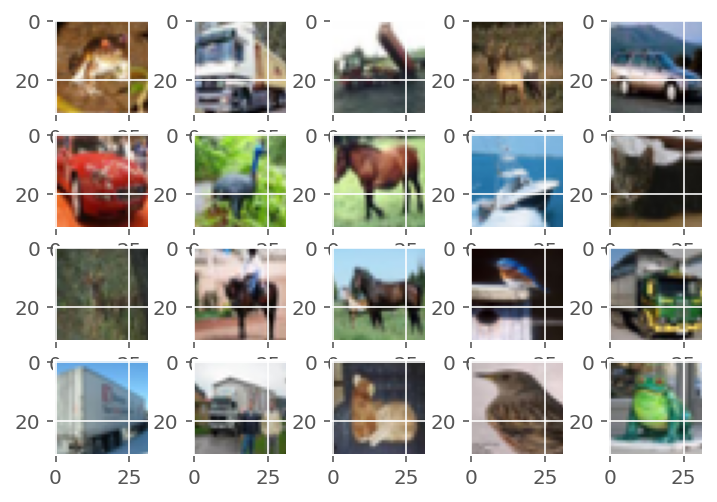

In [30]:

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
n_rows = 4 
n_columns = 5

for i in range( n_rows * n_columns ):
    # Plot with n row and n columns and current plot being drawn is (i+1)
    plt.subplot(n_rows,n_columns,i+1)
    plt.imshow(trainX[i])
plt.show()

In [31]:
#trainy

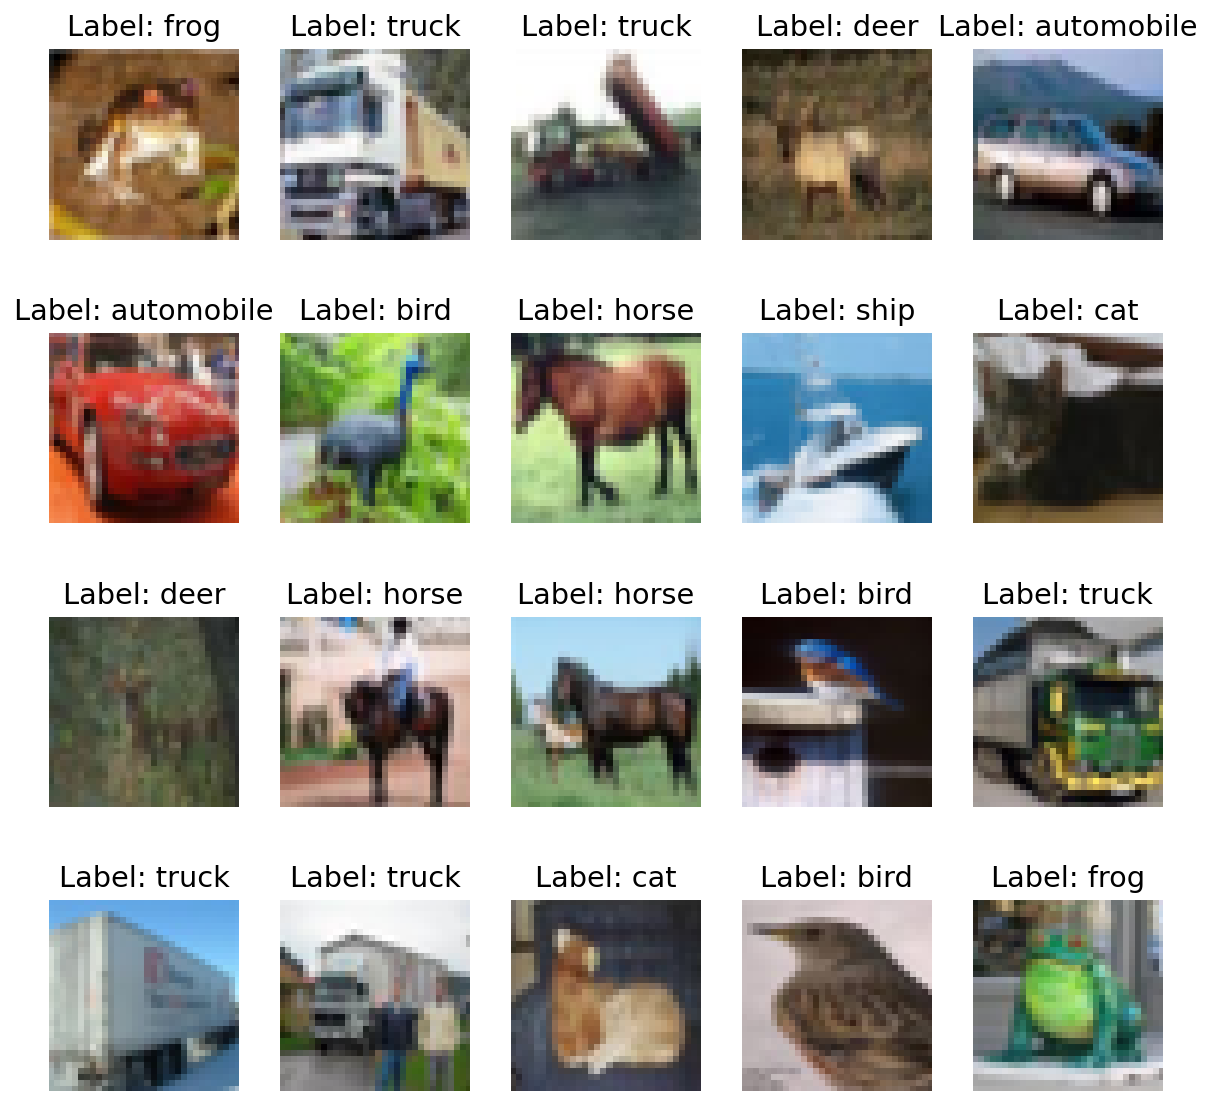

In [32]:
# adopted from : 
# https://www.binarystudy.com/2021/09/how-to-load-preprocess-visualize-CIFAR-10-and-CIFAR-100.html
# printing the label with the subplot 
# define figure
fig=plt.figure(figsize=(10, 10))

n_rows = 4 
n_columns = 5

# visualize these random images
for i in range(1, n_columns*n_rows +1):
    fig.add_subplot(n_rows, n_columns, i)
    #plt.imshow(images[i-1])
    plt.imshow(trainX[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.title("Label: {}".format(label_names[trainy[i-1]]))
plt.show()

### Distribution of different classes in [training]

Text(0.5, 1.0, 'Class distribution in training set')

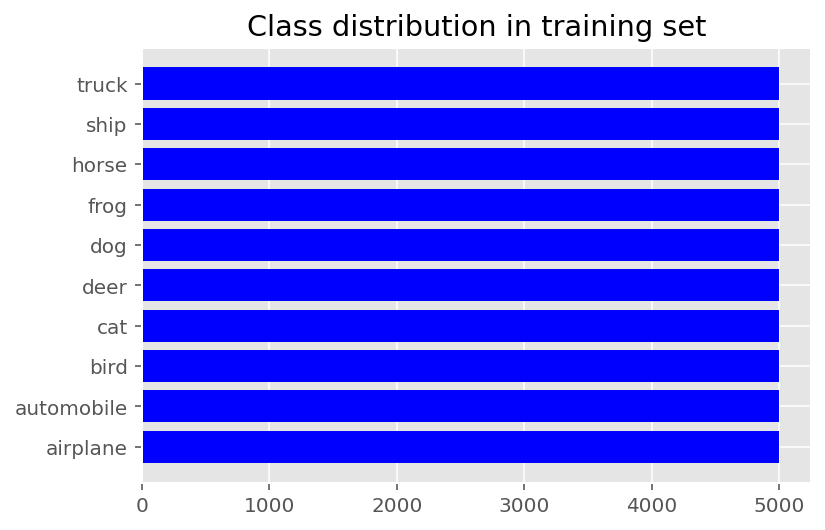

In [ ]:
#print out the distribution for training set
classes, counts = np.unique(trainy, return_counts=True)
plt.barh(load_label_names(), counts, color='blue')
plt.title('Class distribution in training set')

We see that every class has 5000 (uniform) in training set - this is fine.

### Distribution of different classes in [testing set]

Text(0.5, 1.0, 'Class distribution in testing set')

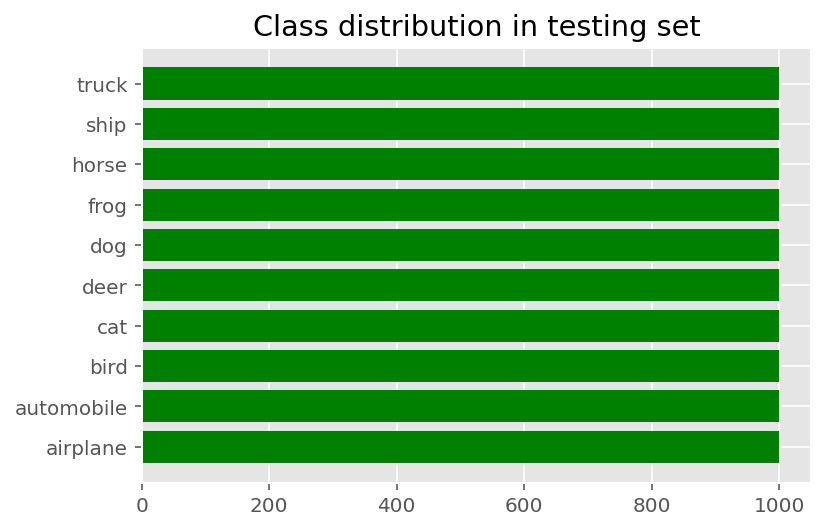

In [ ]:
classes, counts = np.unique(testy, return_counts=True)
plt.barh(load_label_names(), counts, color='green')
plt.title('Class distribution in testing set')

We see that every class has 1000 (uniform) in testing set - this is fine.

In [33]:
def prep_pixelsAsFloat32 (train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    #train_norm = train_norm / 255.0
    #test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [34]:
( trainX, testX ) = prep_pixelsAsFloat32 ( trainX, testX )

In [35]:
# load train and test dataset
def convertToCategorial (trainY1, testY1 ):
    # load dataset
    #(trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    #trainY = keras.utils.np_utils.to_categorical (trainY1)
    #testY = keras.utils.np_utils.to_categorical (testY1)
    return ( keras.utils.np_utils.to_categorical (trainY1) , keras.utils.np_utils.to_categorical (testY1)  )

In [36]:
#trainy = keras.utils.np_utils.to_categorical (trainy)
#testy = keras.utils.np_utils.to_categorical (testy)

trainy , testy = convertToCategorial ( trainy, testy )


In [37]:
#they should be one hot encoded
trainy[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [38]:
#they should be one hot encoded
testy[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
len(trainy)

50000

In [40]:
len(testy)

10000

In [41]:
print ( trainy.shape)

(50000, 10)


In [42]:
print ( testy.shape)

(10000, 10)


# END transform these into numpy arrays to work 

# Building model A

START THE REST OF OTHER THINGs

In [ ]:
# define cnn model
def define_model_BASE_VGG02():
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [43]:
def summarize_diagnostics_02 (model_log, filename1):
    
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

    ax1.plot(model_log.history['accuracy'])
    ax1.plot(model_log.history['val_accuracy'])
    ax1.set_title('Accuracy (Higher Better)')
    ax1.set(xlabel='Epoch', ylabel='Accuracy')
    ax1.legend(['train', 'validation'], loc='lower right')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    ax2.plot(model_log.history['loss'])
    ax2.plot(model_log.history['val_loss'])
    ax2.set_title('Loss (Lower Better)')
    ax2.set(xlabel='Epoch', ylabel='Loss')
    ax2.legend(['train', 'validation'], loc='upper right')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

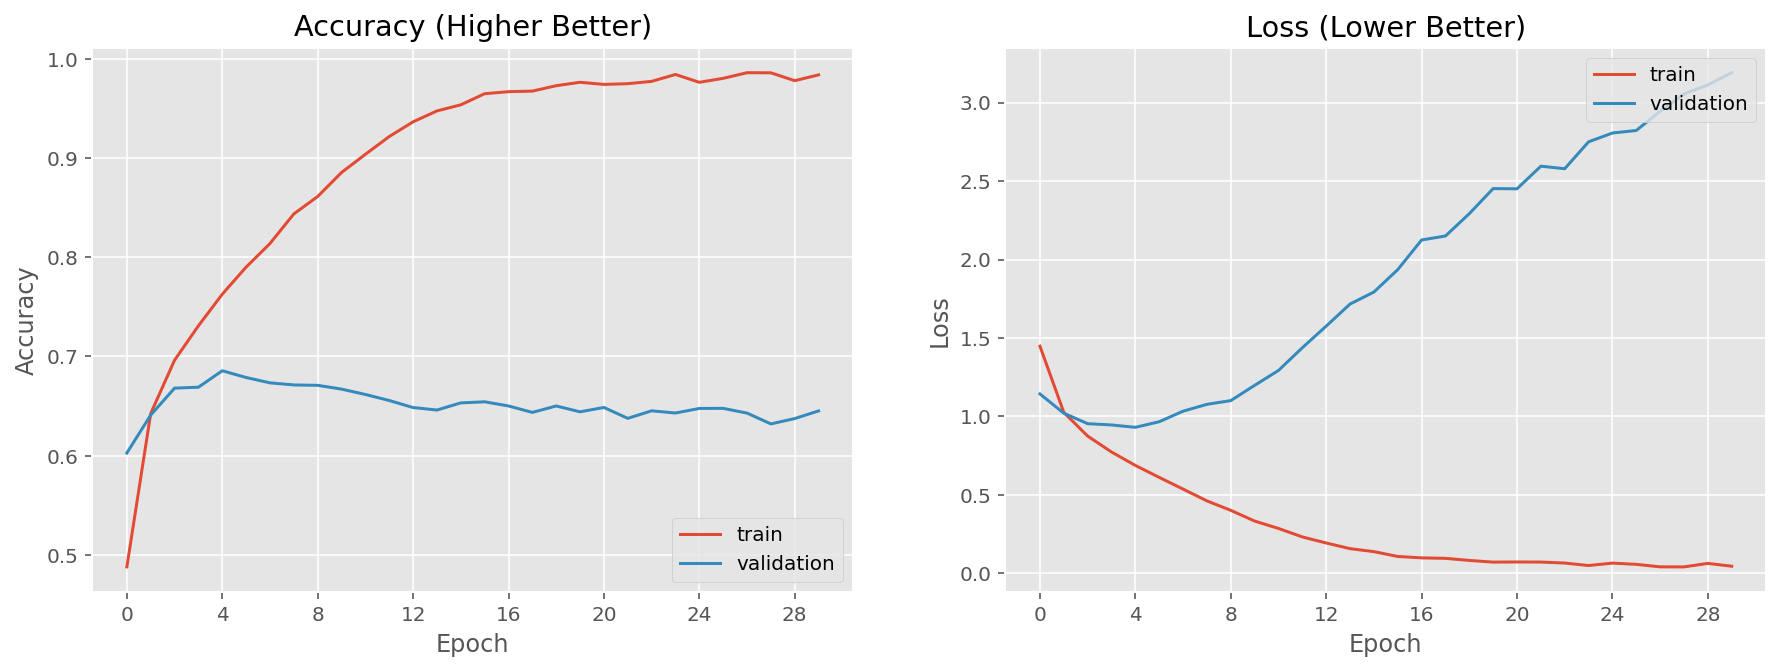

In [ ]:
import time
start = time.time()

model = define_model_BASE_VGG02()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=30, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))

end = time.time()
print('Time Taken = ', (end - start) )

#score = model.evaluate(x_test, y_test, verbose=0)

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
# define cnn model
# add 1 more layer of Dense (128 ) 
def define_model_BASE_VGG02():
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                      

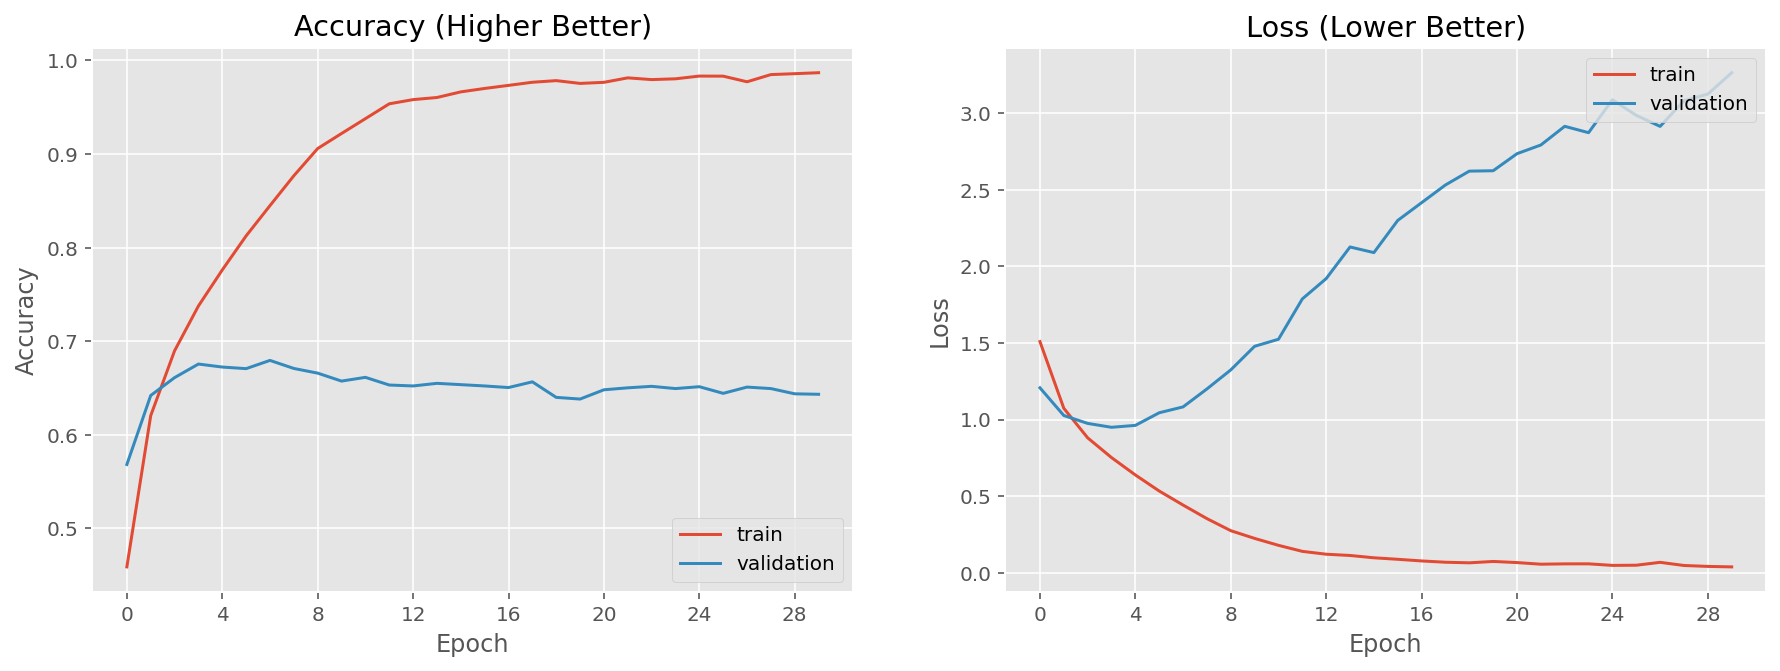

In [ ]:
import time
start = time.time()

model = define_model_BASE_VGG02()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=30, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))

end = time.time()
print('Time Taken = ', (end - start) )

#score = model.evaluate(x_test, y_test, verbose=0)

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
# define cnn model
# Add 1 CNN -  16, (3, 3) 
# Add 1 Max Pooling2D 

# reduce dense layers to 64 each 

def define_model_BASE_VGG02():
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    #model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Add 1 CNN -  16, (3, 3)
Add 1 Max Pooling2D
reduce dense layers to 64 each
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                             

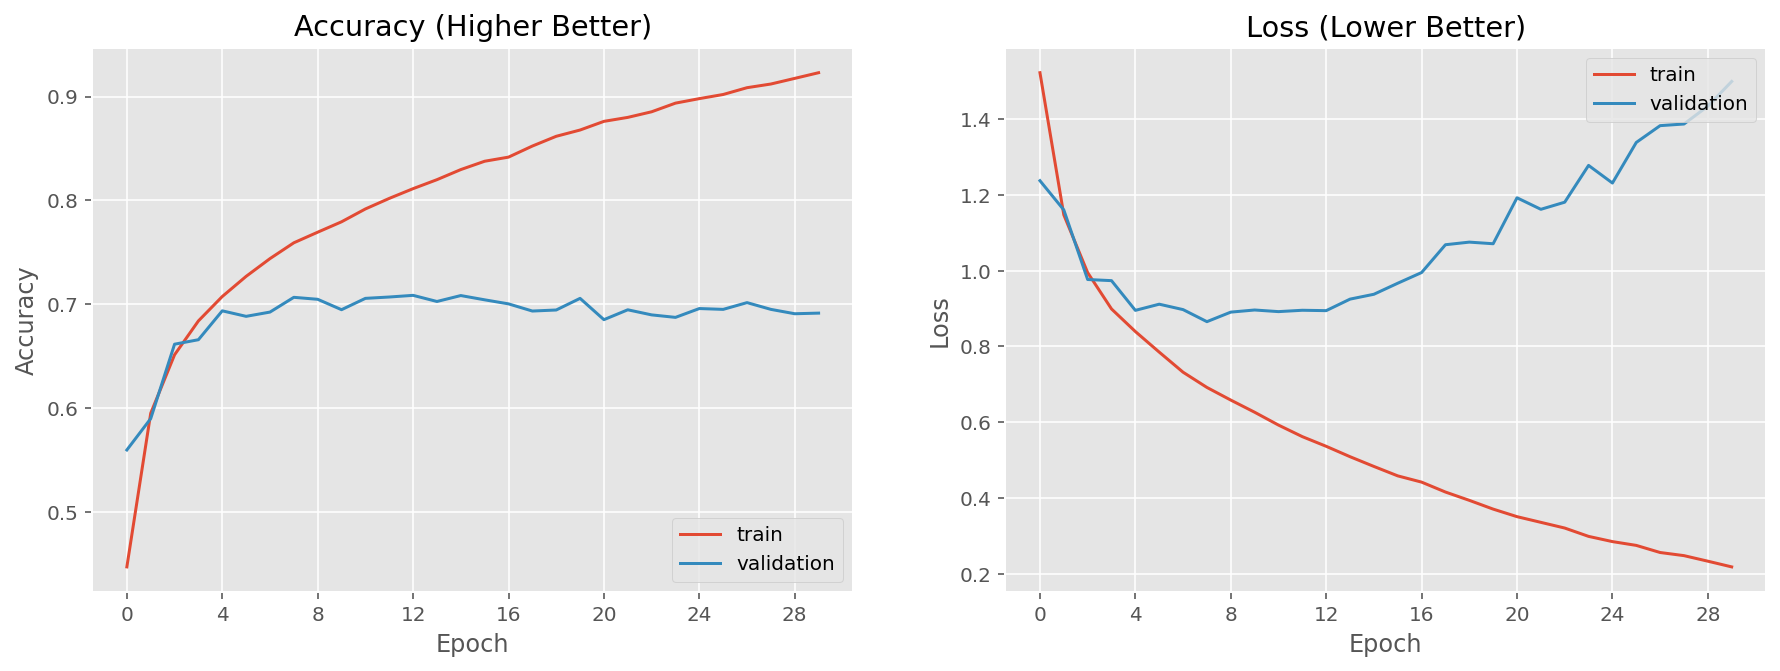

In [ ]:
print ('Add 1 CNN -  16, (3, 3)')
print ('Add 1 Max Pooling2D') 

print ('reduce dense layers to 64 each') 


import time
start = time.time()

model = define_model_BASE_VGG02()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=30, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))

end = time.time()
print('Time Taken = ', (end - start) )

#score = model.evaluate(x_test, y_test, verbose=0)

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
# define cnn model
# Add 1 CNN -  16, (3, 3) 
# Add 1 Max Pooling2D 

def define_model_BASE_VGG02():
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    #model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Add 1 CNN -  16, (3, 3)
Add 1 Max Pooling2D
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10

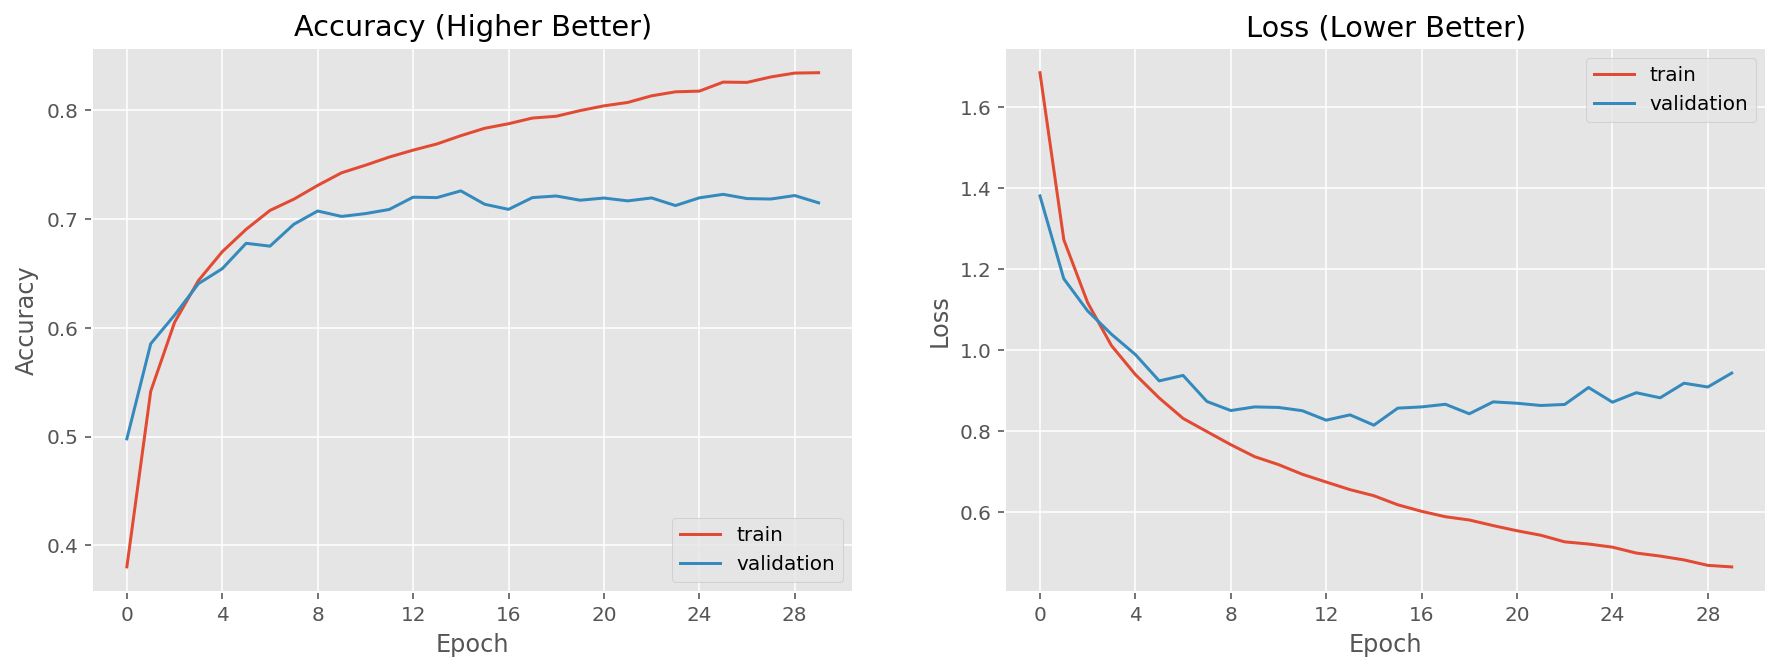

In [ ]:
print ('Add 1 CNN -  16, (3, 3)')
print ('Add 1 Max Pooling2D')

import time
start = time.time()

model = define_model_BASE_VGG02()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=30, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))

end = time.time()
print('Time Taken = ', (end - start) )

#score = model.evaluate(x_test, y_test, verbose=0)

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
# define cnn model
#inroduing droput 

def define_model_BASE_VGG02():
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Introducing dropout = 0.2 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                       

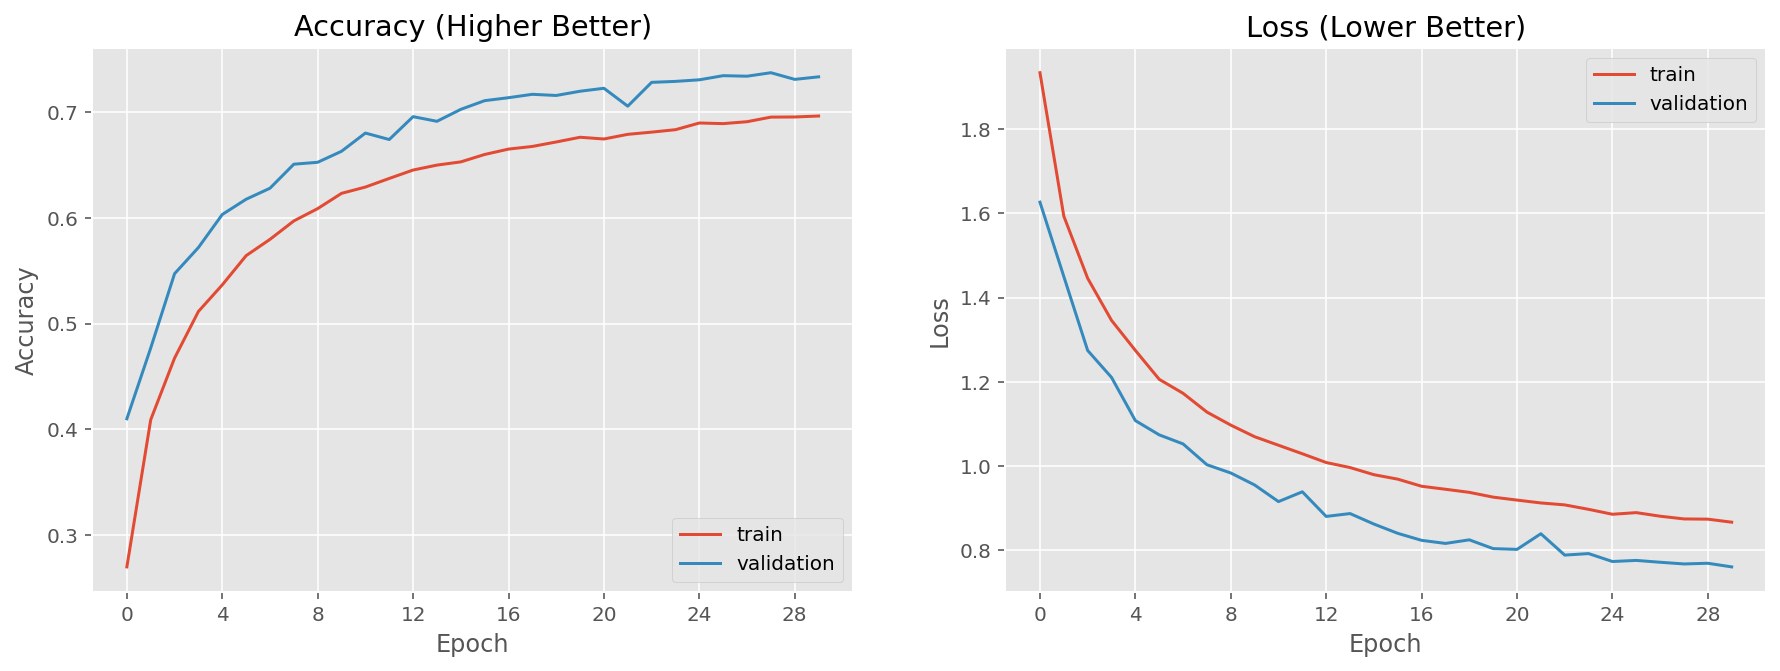

In [ ]:
print('Introducing dropout = 0.2 ')

import time
start = time.time()

model = define_model_BASE_VGG02()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=30, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))

end = time.time()
print('Time Taken = ', (end - start) )

#score = model.evaluate(x_test, y_test, verbose=0)

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
# define cnn model
def define_model_BASE_VGG02():
    print ('Change from 64 > 128 in dense ')
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Change epoch = 60
Change 64 > 128 in dense 
Change from 64 > 128 in dense 
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 16

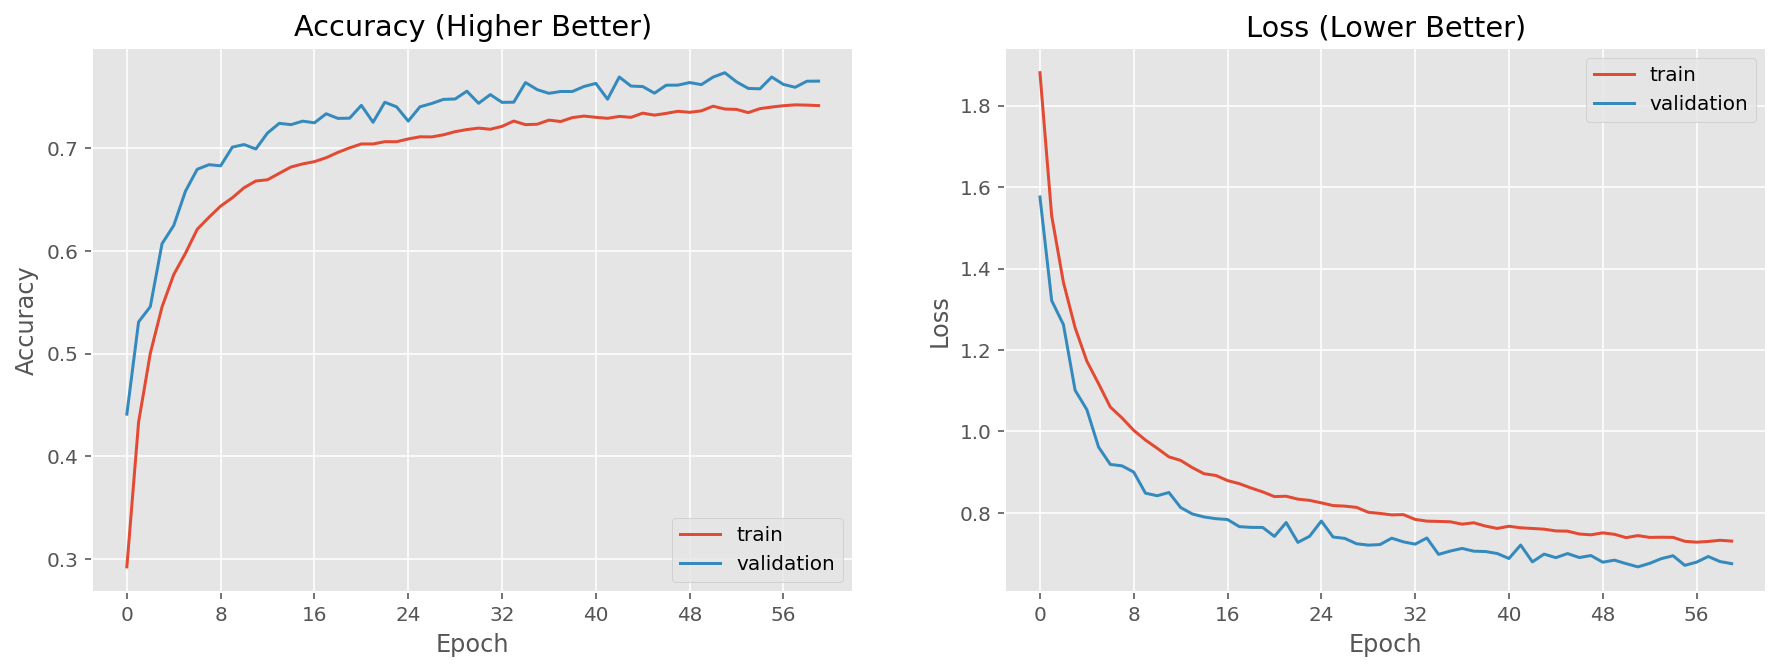

In [ ]:
print ('Change epoch = 60')
print ('Change 64 > 128 in dense ')



import time
start = time.time()

model = define_model_BASE_VGG02()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=60, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))

end = time.time()
print('Time Taken = ', (end - start) )

#score = model.evaluate(x_test, y_test, verbose=0)

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
#CLEAR THIS 

In [ ]:
#CLEAR THIS 

In [ ]:
#RUN THIS
def define_model_BASE_VGG02():
    print ('Change incrementing feature maps in feature map after 1st ')
    print ('seq CNN 16 change to 64' ) 
    print ('seq CNN 64 change to 128' )
    
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Change incrementing feature maps in feature map after 1st 
seq CNN 16 change to 64
seq CNN 64 change to 128
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling

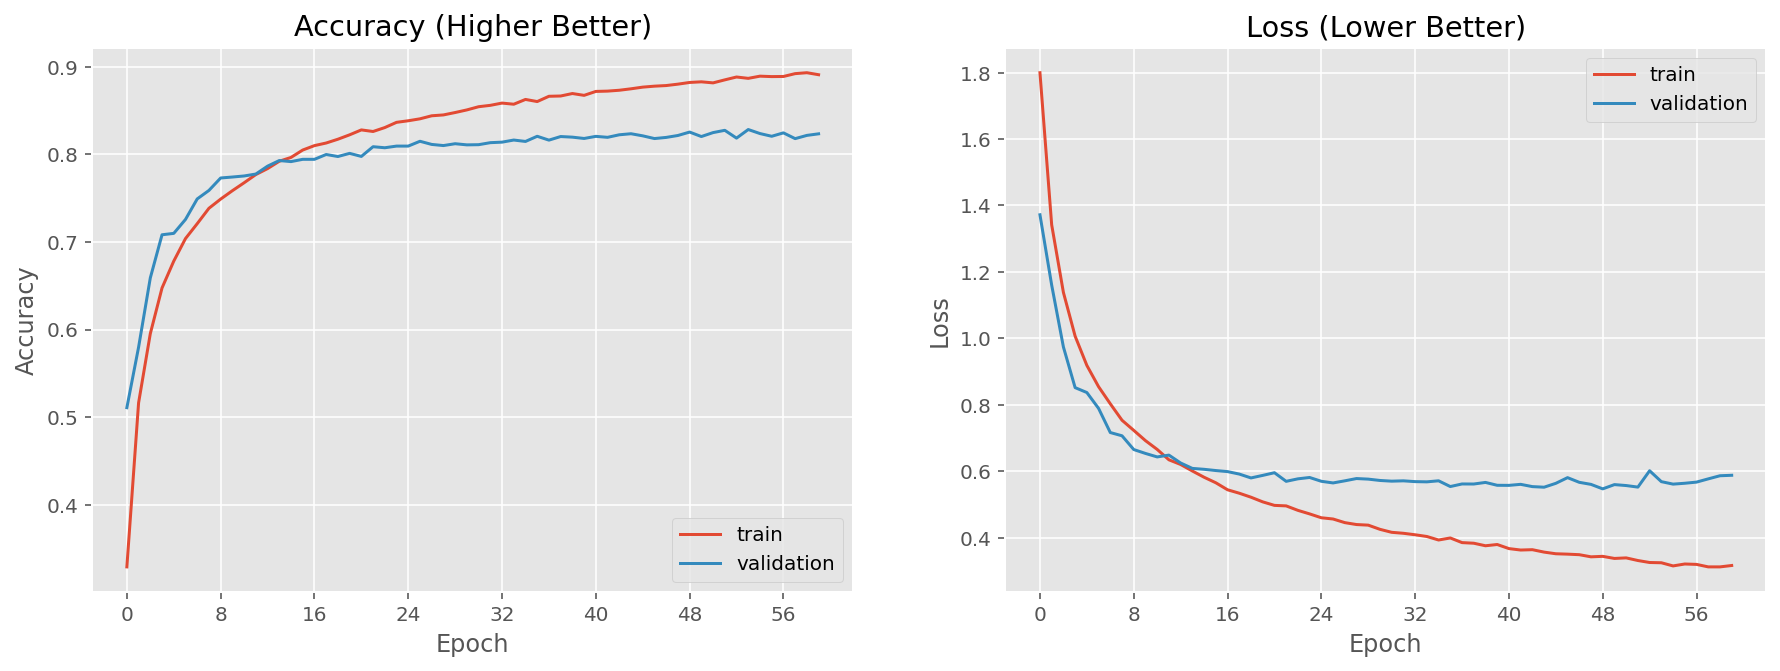

In [ ]:
#RUN THIS
import time
start = time.time()

model = define_model_BASE_VGG02()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=60, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))

end = time.time()
print('Time Taken = ', (end - start) )

#score = model.evaluate(x_test, y_test, verbose=0)

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
#RUNTHIS
def define_model_BASE_VGG02():
    print ('Adding 1 more layer of 64 con2D and 1 x 128 dense ')
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Adding 1 more layer of 64 con2D and 1 x 128 dense 
Adding 1 more layer of 64 con2D and 1 x 128 dense 
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_24 

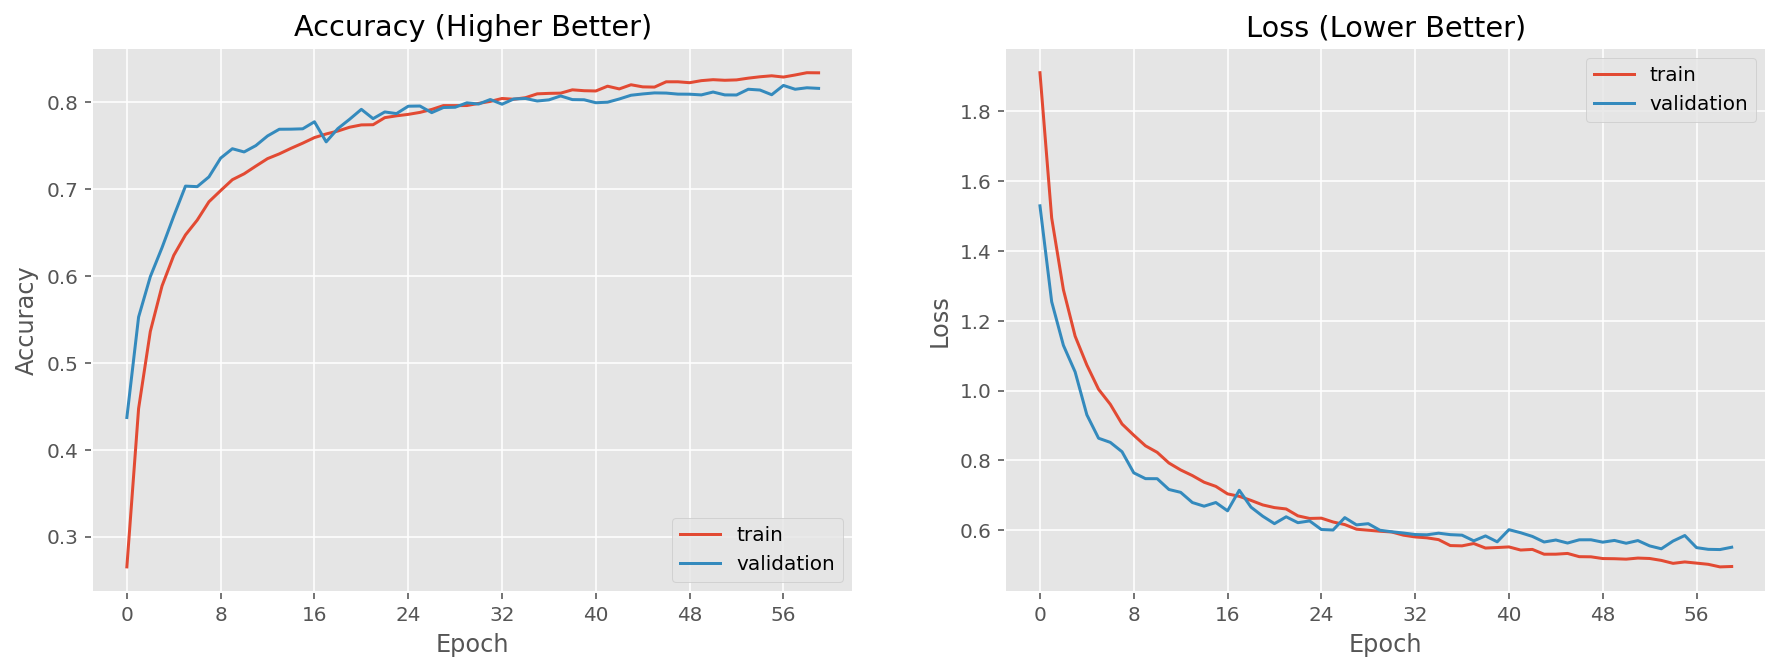

In [ ]:
#RUNTHIS
import time
start = time.time()
print ('Adding 1 more layer of 64 con2D and 1 x 128 dense ')

model = define_model_BASE_VGG02()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=60, batch_size=100, validation_data=(testX, testy), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))

end = time.time()
print('Time Taken = ', (end - start) )

#score = model.evaluate(x_test, y_test, verbose=0)

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

Added: change: we now adopt a early stopping at epochs = 60 
Added: change: we now adopt a early stopping (based on loss) at epochs = 60 
Adding 1 more layer of 64 con2D and 1 x 128 dense 
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        18496  

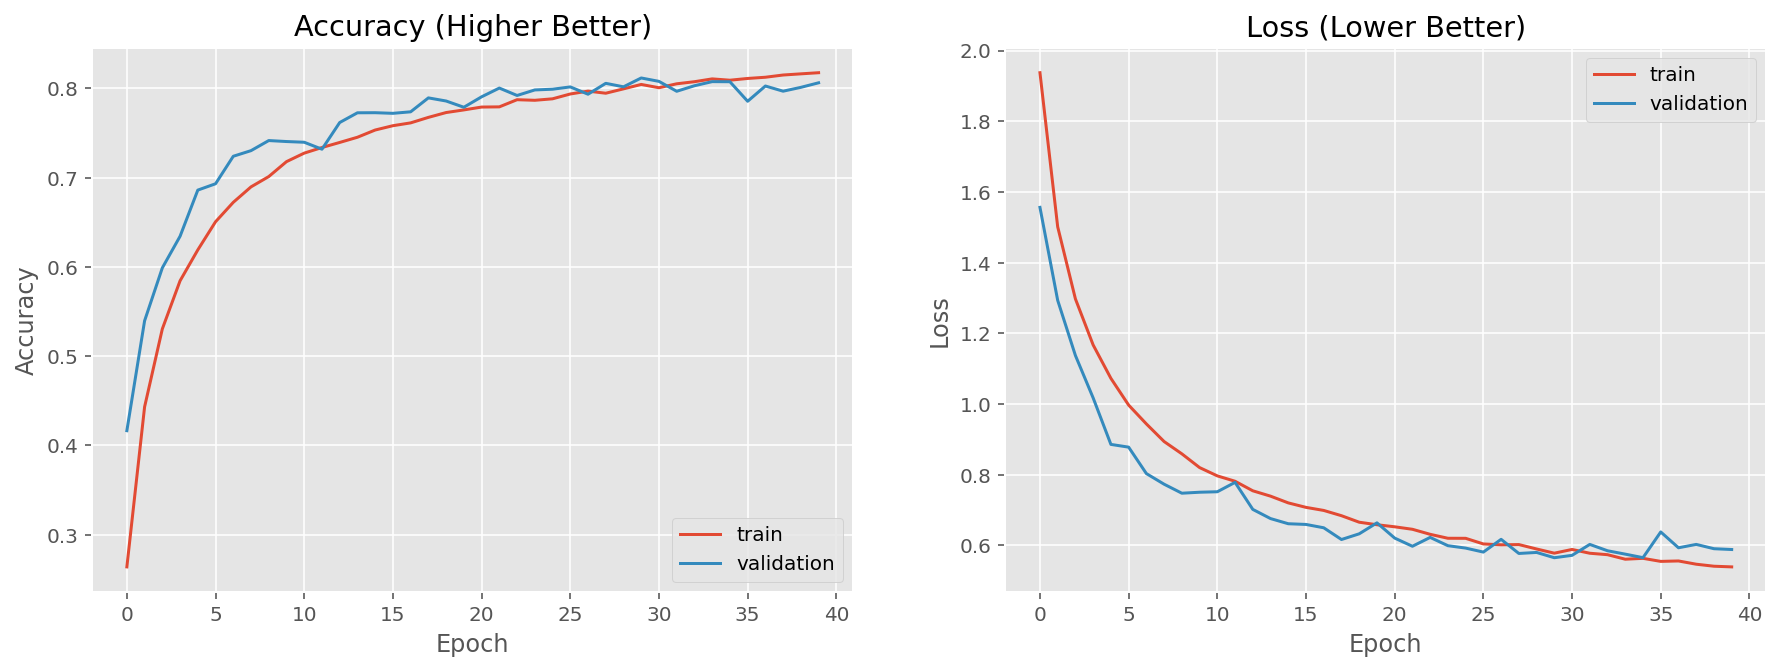

In [ ]:
#RUNTHIS
print ('Added: change: we now adopt a early stopping at epochs = 60 ')
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience =10, verbose=1)

#let's adopt an early stopping
es2 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=False,
)

import time
start = time.time()
print ('Added: change: we now adopt a early stopping (based on loss) at epochs = 60 ')

model = define_model_BASE_VGG02()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=60, batch_size=100, validation_data=(testX, testy), verbose=1, callbacks=[es2])
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))

end = time.time()
print('Time Taken = ', (end - start) )

#score = model.evaluate(x_test, y_test, verbose=0)

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
#RUNTHIS
from tensorflow.keras.layers import BatchNormalization
def define_model_BASE_VGG03():
    print ('Added Batch Normalization  ')
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

##before  or after activation is also fine 

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    

    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    

    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Adopting Batch Normalization with callbacks on loss 
Added Batch Normalization  
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                 

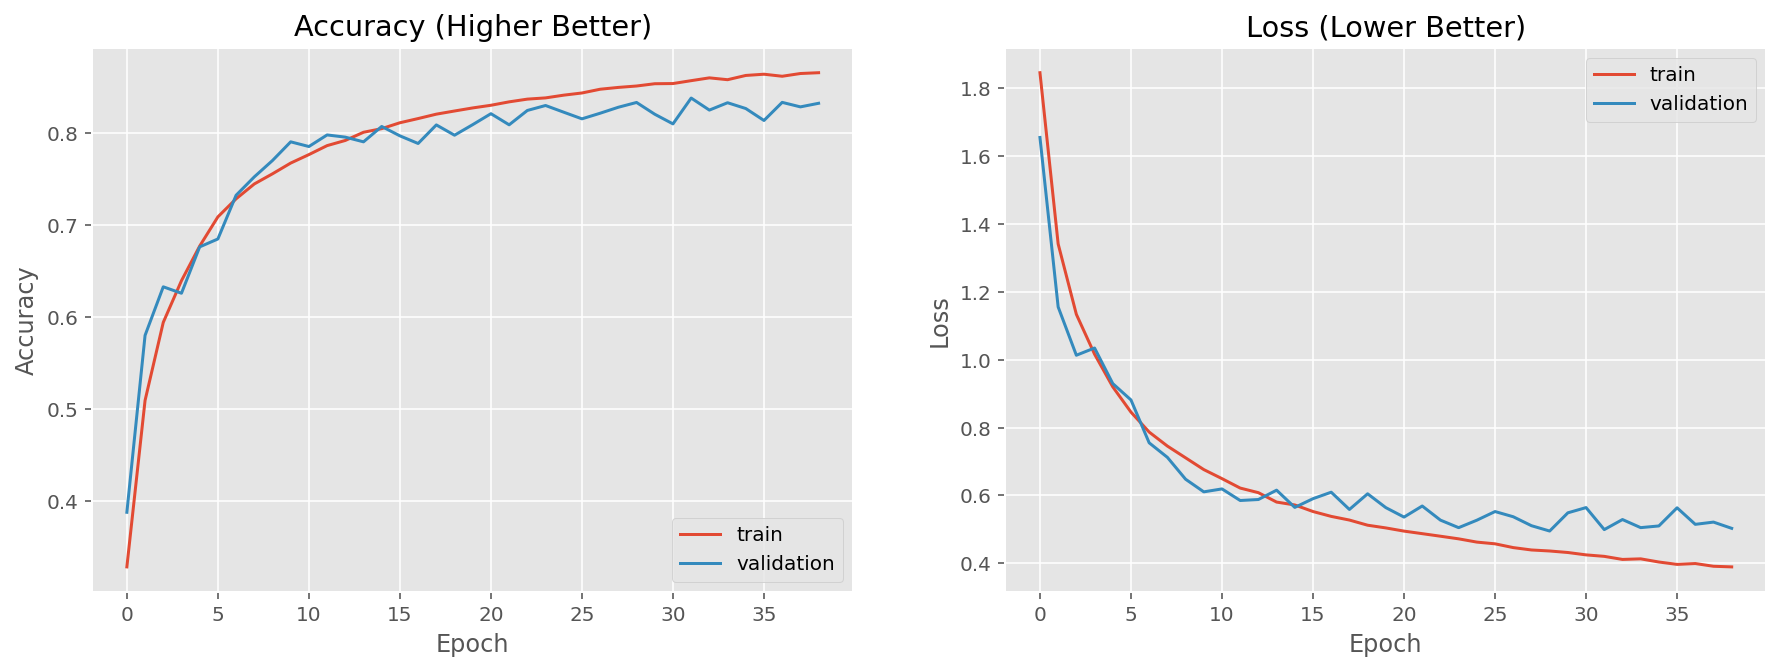

In [ ]:
#RUNTHIS
print ('Adopting Batch Normalization with callbacks on loss ')
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience =10, verbose=1)

#let's adopt an early stopping
es2 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=False,
)

import time
start = time.time()

model = define_model_BASE_VGG03()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=60, batch_size=100, validation_data=(testX, testy), verbose=1, callbacks=[es2] )
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))
#score = model.evaluate(x_test, y_test, verbose=0)

end = time.time()
print('Time Taken = ', (end - start) )

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

Adopting Batch Normalization with callbacks for Accuracy 
Added Batch Normalization  
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                            

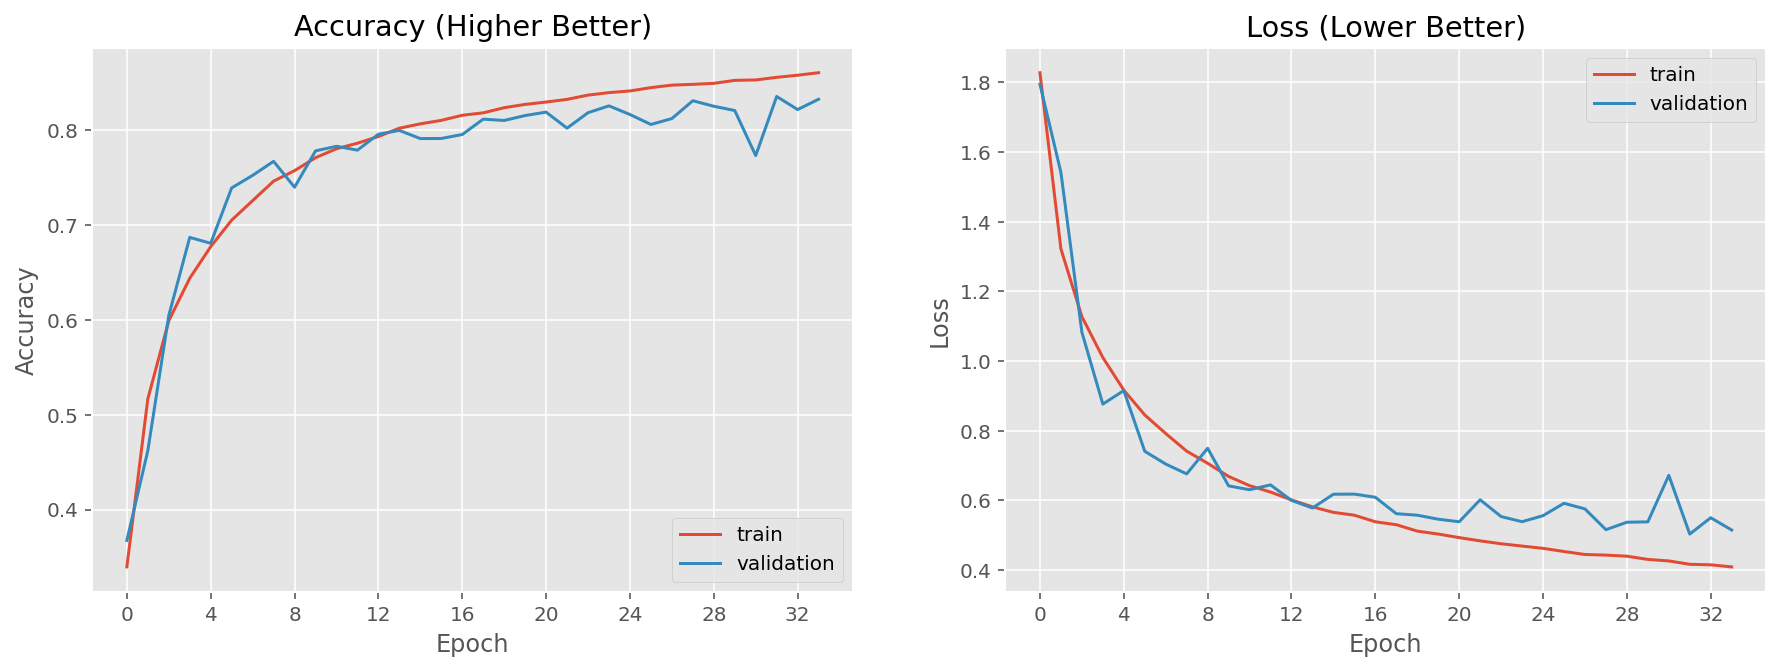

In [ ]:
#RUNTHIS
print ('Adopting Batch Normalization with callbacks for Accuracy ')
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience =10, verbose=1)

#let's adopt an early stopping
es2 = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=False,
)

esForAccuracy = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience =10, min_delta=0.01, verbose=1)


import time
start = time.time()

model = define_model_BASE_VGG03()
#model =  define_model(7)
print (model.summary() ) 
# fit model
history = model.fit(trainX, trainy, epochs=60, batch_size=100, validation_data=(testX, testy), verbose=1, callbacks=[esForAccuracy] )
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))
#score = model.evaluate(x_test, y_test, verbose=0)
end = time.time()
print('Time Taken = ', (end - start) )


# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

In [ ]:
import time
today = time.strftime("%Y%m%d")
filename='model_' + today + '_afterBN_epoch60_ES_fin.h5' 

model.save(filename)
print("Saved model to disk")

Saved model to disk


In [ ]:
## print ('Adopting Batch Normalization with callbacks epoch = 100  ')
## es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience =10, verbose=1)
## 
## #let's adopt an early stopping
## es2 = tf.keras.callbacks.EarlyStopping(
##     monitor="val_loss",
##     min_delta=0,
##     patience=10,
##     verbose=1,
##     mode="min",
##     baseline=None,
##     restore_best_weights=False,
## )
## 
## 
## model = define_model_BASE_VGG03()
## #model =  define_model(7)
## print (model.summary() ) 
## print ('Starting Run for Epochs # ', 100 )
## # fit model
## history = model.fit(trainX, trainy, epochs=100, batch_size=100, validation_data=(testX, testy), verbose=1, callbacks=[es2] )
## # evaluate model
## _, acc = model.evaluate(testX, testy, verbose=0)
## print(' [Acc] > %.3f' % (acc * 100.0))
## #score = model.evaluate(x_test, y_test, verbose=0)
## 
## # learning curves
## 
## now = datetime.now() # current date and time
## nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
## print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
## filename1='testing' + nowTimeStampYYYYMMDD 
## summarize_diagnostics_02(history, filename1)

In [ ]:
#model.save("model_20211107_afterBN_fin_epoch100.h5")
#print("Saved model to disk")

import time
today = time.strftime("%Y%m%d")
filename='model_' + today + '_afterBN_epoch60_ESAccuracy_fin.h5' 

model.save(filename)
print("Saved model to disk")

Saved model to disk


In [ ]:
#model.save("model_20211111_afterBN_fin_epoch60_earlystopping.h5")
#print("Saved model to disk")

Saved model to disk


In [ ]:
#20211115 - implementing leaky relu 

from tensorflow.keras.layers import BatchNormalization
def define_model_BASE_VGG04_LeakyRelu():
    print ('Added Batch Normalization  ')
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

##before  or after activation is also fine 

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3) , kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    

    model.add(tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    

    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#20211115 - implementing leaky relu
#20211126 - put in run eagerly -> so that we can get the heatmap later when we load in the model 

from tensorflow.keras.layers import BatchNormalization
def define_model_BASE_VGG04_LeakyRelu_Eagerly():
    print ('Added Batch Normalization  ')
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

##before  or after activation is also fine 

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3) , kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    

    model.add(tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    

    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
    return model

In [ ]:
print ('Adopting Batch Normalization with callbacks ')
print ('Implementing Leaky ReLu in activation Negative slope coefficient alpha = ', 0.3 )
print ('Changing to Early Stopping  = val_accuracy ')
print (' Adding param run_eagerly=True ')
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience =10, verbose=1)

#let's adopt an early stopping
es2 = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.01,
    patience=10,
    verbose=1,
    mode="max",
    baseline=None,
    restore_best_weights=False,
)

import time
start = time.time()

#model = define_model_BASE_VGG04_LeakyRelu()
model = define_model_BASE_VGG04_LeakyRelu_Eagerly()
#model =  define_model(7)
print (model.summary() )



print ('Starting Run for Epochs # ', 60 )
# fit model
#add in run_eagerly=True
history = model.fit(trainX, trainy, epochs=60, batch_size=100, validation_data=(testX, testy), verbose=1, callbacks=[es2] )
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))
#score = model.evaluate(x_test, y_test, verbose=0)

end = time.time()
print('Time Taken = ', (end - start) )

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

Adopting Batch Normalization with callbacks 
Implementing Leaky ReLu in activation Negative slope coefficient alpha =  0.3
Changing to Early Stopping  = val_accuracy 
 Adding param run_eagerly=True 
Added Batch Normalization  
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                           

NameError: ignored

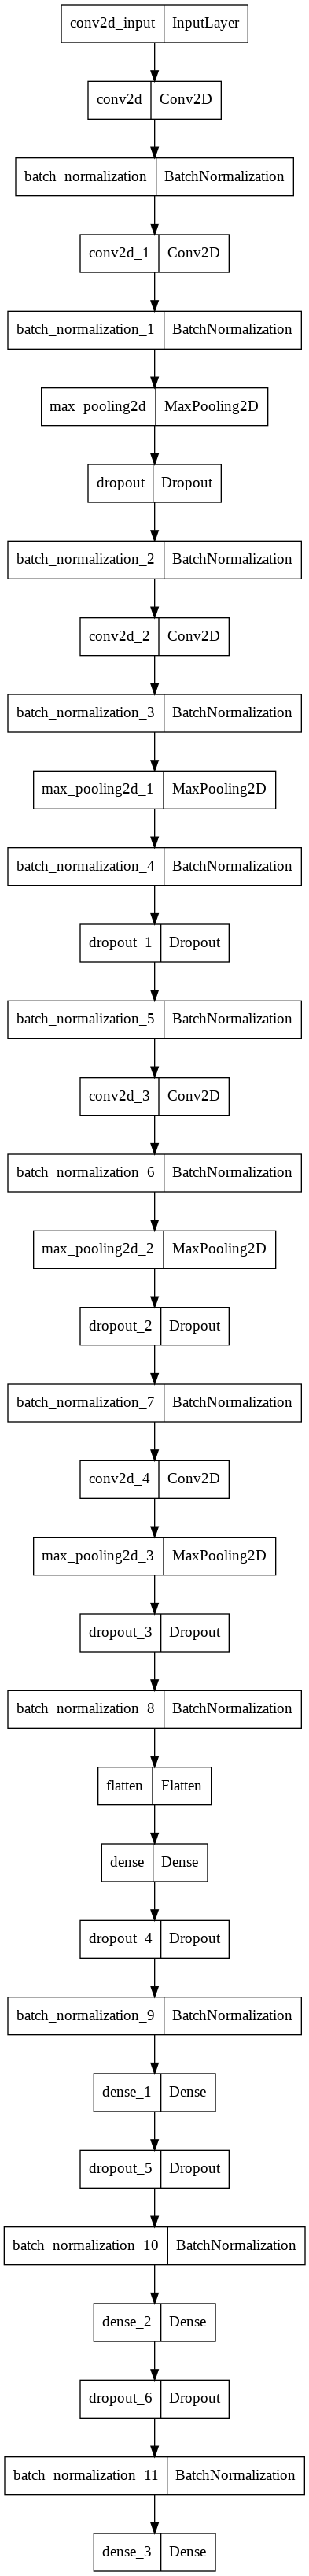

In [ ]:
#RUNTHIS
import time
today = time.strftime("%Y%m%d")
modelfile = today +'_modelA_LeakyRelu.png'
tf.keras.utils.plot_model(
    model, to_file=modelfile, show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [ ]:
#USETHIS_TO_CALC_FIN
import time
today = time.strftime("%Y%m%d")
filename='model_' + today + '_afterBN_epoch60_ESAccuracy_Leaky_Eagerly_fin.h5' 

model.save(filename)
print("Saved model to disk")



Saved model to disk


In [ ]:
##20211122 Implementing L2 Regulrization on the last dense layer 
#20211115 - implementing leaky relu 

from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.regularizers import Regularizer



def define_model_BASE_VGG05_L2Regularization():
    print ('Added regularizersL2 at 3 dense layer  ')
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

##before  or after activation is also fine 

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Flatten())
    #this was 128 previous and takes a LONG TIME!!!
    model.add(tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', activity_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    model.add(tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3) , kernel_initializer='he_uniform', activity_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    

    model.add(tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3), kernel_initializer='he_uniform', activity_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    

    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(learning_rate=0.001, momentum=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

 Implementing L2 Regulaization + LeakyRelu 
Added regularizersL2 at 3 dense layer  
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_45 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_63 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_46 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                              

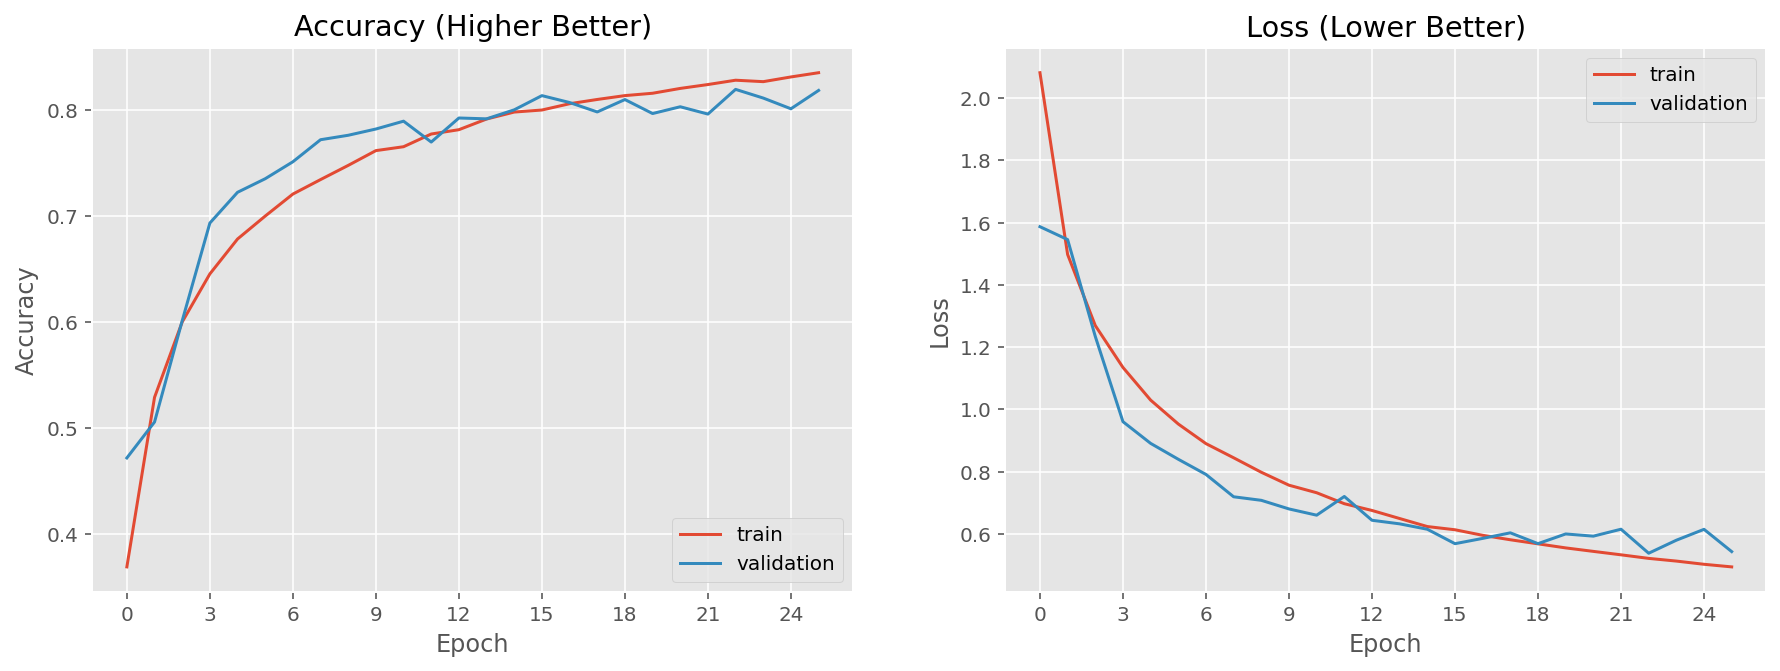

In [ ]:

#let's adopt an early stopping
es2 = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.01,
    patience=10,
    verbose=1,
    mode="max",
    baseline=None,
    restore_best_weights=False,
)

print (' Implementing L2 Regulaization + LeakyRelu ')
import time
start = time.time()

model = define_model_BASE_VGG05_L2Regularization ()
#model =  define_model(7)
print (model.summary() )

print ('Starting Run for Epochs # ', 60 )
# fit model
history = model.fit(trainX, trainy, epochs=60, batch_size=100, validation_data=(testX, testy), verbose=1, callbacks=[es2] )
# evaluate model
_, acc = model.evaluate(testX, testy, verbose=0)
print(' [Acc] > %.3f' % (acc * 100.0))
#score = model.evaluate(x_test, y_test, verbose=0)
end = time.time()
print('Time Taken = ', (end - start) )

# learning curves

now = datetime.now() # current date and time
nowTimeStampYYYYMMDD = now.strftime("%Y%m%d"+'_'+ "%H%M%S" )
print("nowTimeStampYYYYMMDD:", nowTimeStampYYYYMMDD)
filename1='testing' + nowTimeStampYYYYMMDD 
summarize_diagnostics_02(history, filename1)

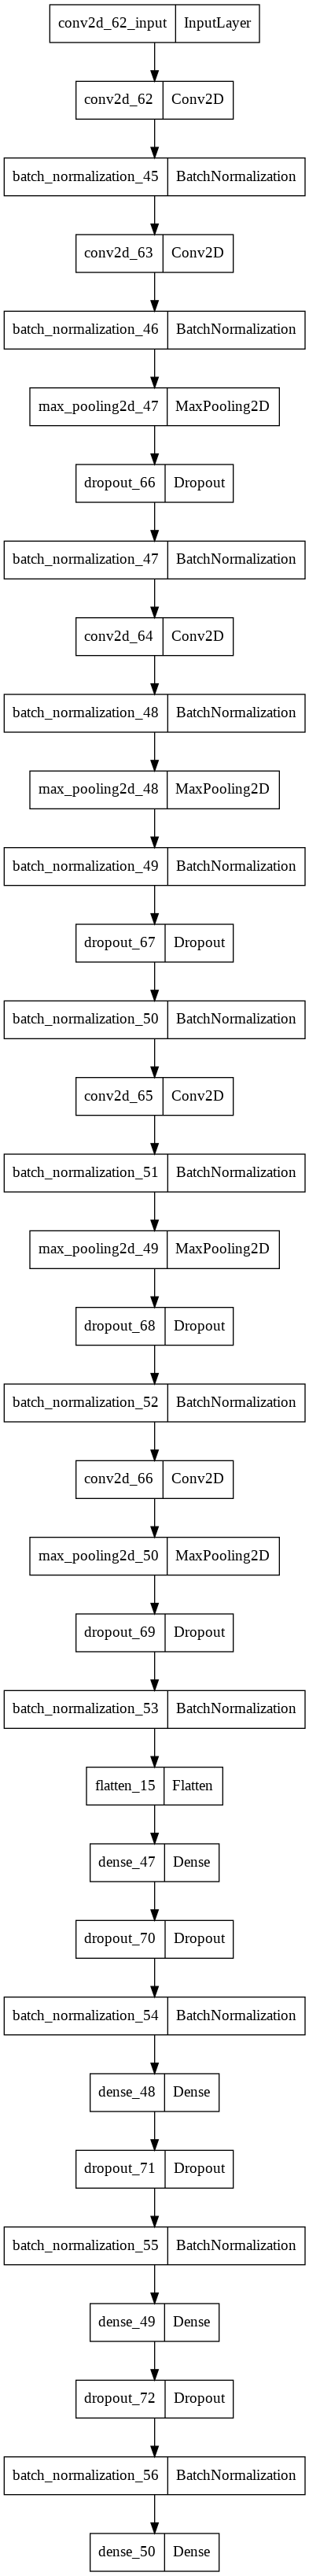

In [ ]:
#RUNTHIS
modelfile = 'modelA_LeakyRelu_withL2Regul.png'
tf.keras.utils.plot_model(
    model, to_file=modelfile, show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [ ]:
#model.save("model_20211107_afterBN_fin_epoch100.h5")
#print("Saved model to disk")

import time
today = time.strftime("%Y%m%d")
filename='model_' + today + '_afterBN_epoch60_ESAccuracy_Leaky_L2_fin.h5' 

model.save(filename)
print("Saved model to disk")

Saved model to disk


## (Optional) Using K fold CV 

Reference : https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/


In [ ]:
# Optional Run : Put all trainX, testX as inputs and trainy, testy as output 
# and run a 10 folds
# epochs = 25 


In [ ]:
seed = 7
numpy.random.seed(seed)
from sklearn.model_selection import KFold

num_folds = 10
batch_size = 100

no_classes = 10
no_epochs = 25

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((trainX, testX), axis=0)
targets = np.concatenate((trainy, testy), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = define_model_BASE_VGG04_LeakyRelu()


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=1)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Added Batch Normalization  
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
540/540 [==============================] - 54s 42ms/step - loss: 1.6666 - accuracy: 0.3946
Epoch 2/25
540/540 [==============================] - 22s 42ms/step - loss: 1.2029 - accuracy: 0.5666
Epoch 3/25
540/540 [==============================] - 22s 40ms/step - loss: 1.0286 - accuracy: 0.6359
Epoch 4/25
540/540 [==============================] - 21s 39ms/step - loss: 0.9157 - accuracy: 0.6794
Epoch 5/25
540/540 [==============================] - 21s 39ms/step - loss: 0.8394 - accuracy: 0.7077
Epoch 6/25
540/540 [==============================] - 21s 39ms/step - loss: 0.7824 - accuracy: 0.7265
Epoch 7/25
540/540 [==============================] - 21s 39ms/step - loss: 0.7354 - accuracy: 0.7426
Epoch 8/25
540/540 [==============================] - 21s 39ms/step - loss: 0.6992 - accuracy: 0.7557
Epoch 9/25
540/540 [==============================] - 21s 3

## End Using K fold CV 

# END Building a Model

# Getting an Evaluation

In [44]:
#Optional - we load back the saved model if we are coming to this work on another day 
#model = tf.keras.models.load_model(
#    'model_20211123_afterBN_epoch60_ESAccuracy_Leaky_fin.h5', custom_objects=None, compile=True, options=None
#)

# model = tf.keras.models.load_model( 'model_20211126_afterBN_epoch60_ESAccuracy_Leaky_Eagerly_fin.h5', custom_objects=None, 
#                                   compile=True, options=None ) 


In [45]:
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

In [46]:
#expected around 0.92
train_acc

0.9321399927139282

In [47]:
#expected 0.82 - 0.83 
test_acc

0.8281000256538391

In [ ]:
# train_acc

In [48]:
model.summary()
#get picture of model in landscape 
#RUNTHIS
#import time
#today = time.strftime("%Y%m%d")
#modelfile = today +'_modelA_LeakyRelu_LandScape.png'
#tf.keras.utils.plot_model(
#    model, to_file=modelfile, show_shapes=False, show_dtype=False,
#    show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96,
#    layer_range=None, show_layer_activations=False
#)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
# test_acc

# End Getting an evaluation

# START Getting a classification report 

In [49]:
#gettting a confusion matrix 
from sklearn.metrics import classification_report
predict_x = model.predict(testX) 
output = np.argmax(predict_x,axis=1)
print(output)


testyConverted = np.argmax(testy,axis=1)

[3 8 8 ... 5 0 7]


In [50]:
import sklearn.metrics

r = sklearn.metrics.confusion_matrix(testyConverted, output)
print(r)

[[801   7  25  16  23   6   9   9  71  33]
 [  8 866   2   5   2   1   8   1  20  87]
 [ 45   0 730  35  62  57  51  10   5   5]
 [  8   3  46 645  58 134  74  13  13   6]
 [  3   1  35  35 860  19  30  14   3   0]
 [  4   0  32 112  33 775  19  22   2   1]
 [  5   0  20  23  13  12 921   4   1   1]
 [  6   0  20  26  52  51   7 834   1   3]
 [ 23  12   6   6   7   1   4   2 922  17]
 [ 15  20   2   8   1   4   4   5  14 927]]


In [51]:
#workinh with index 
print(classification_report(testyConverted, output,zero_division=0 ))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1000
           1       0.95      0.87      0.91      1000
           2       0.80      0.73      0.76      1000
           3       0.71      0.65      0.68      1000
           4       0.77      0.86      0.81      1000
           5       0.73      0.78      0.75      1000
           6       0.82      0.92      0.87      1000
           7       0.91      0.83      0.87      1000
           8       0.88      0.92      0.90      1000
           9       0.86      0.93      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [52]:
print(classification_report(testyConverted, output,zero_division=0 , target_names=load_label_names() ))

              precision    recall  f1-score   support

    airplane       0.87      0.80      0.84      1000
  automobile       0.95      0.87      0.91      1000
        bird       0.80      0.73      0.76      1000
         cat       0.71      0.65      0.68      1000
        deer       0.77      0.86      0.81      1000
         dog       0.73      0.78      0.75      1000
        frog       0.82      0.92      0.87      1000
       horse       0.91      0.83      0.87      1000
        ship       0.88      0.92      0.90      1000
       truck       0.86      0.93      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



# END Getting a classification report

# GEtting confusion matrix 

In [ ]:
import sklearn.metrics

r = sklearn.metrics.confusion_matrix(testyConverted, output)
print(r)

[[801   7  25  16  23   6   9   9  71  33]
 [  8 866   2   5   2   1   8   1  20  87]
 [ 45   0 730  35  62  57  51  10   5   5]
 [  8   3  46 645  58 134  74  13  13   6]
 [  3   1  35  35 860  19  30  14   3   0]
 [  4   0  32 112  33 775  19  22   2   1]
 [  5   0  20  23  13  12 921   4   1   1]
 [  6   0  20  26  52  51   7 834   1   3]
 [ 23  12   6   6   7   1   4   2 922  17]
 [ 15  20   2   8   1   4   4   5  14 927]]


Printing confusion matrix without label names 


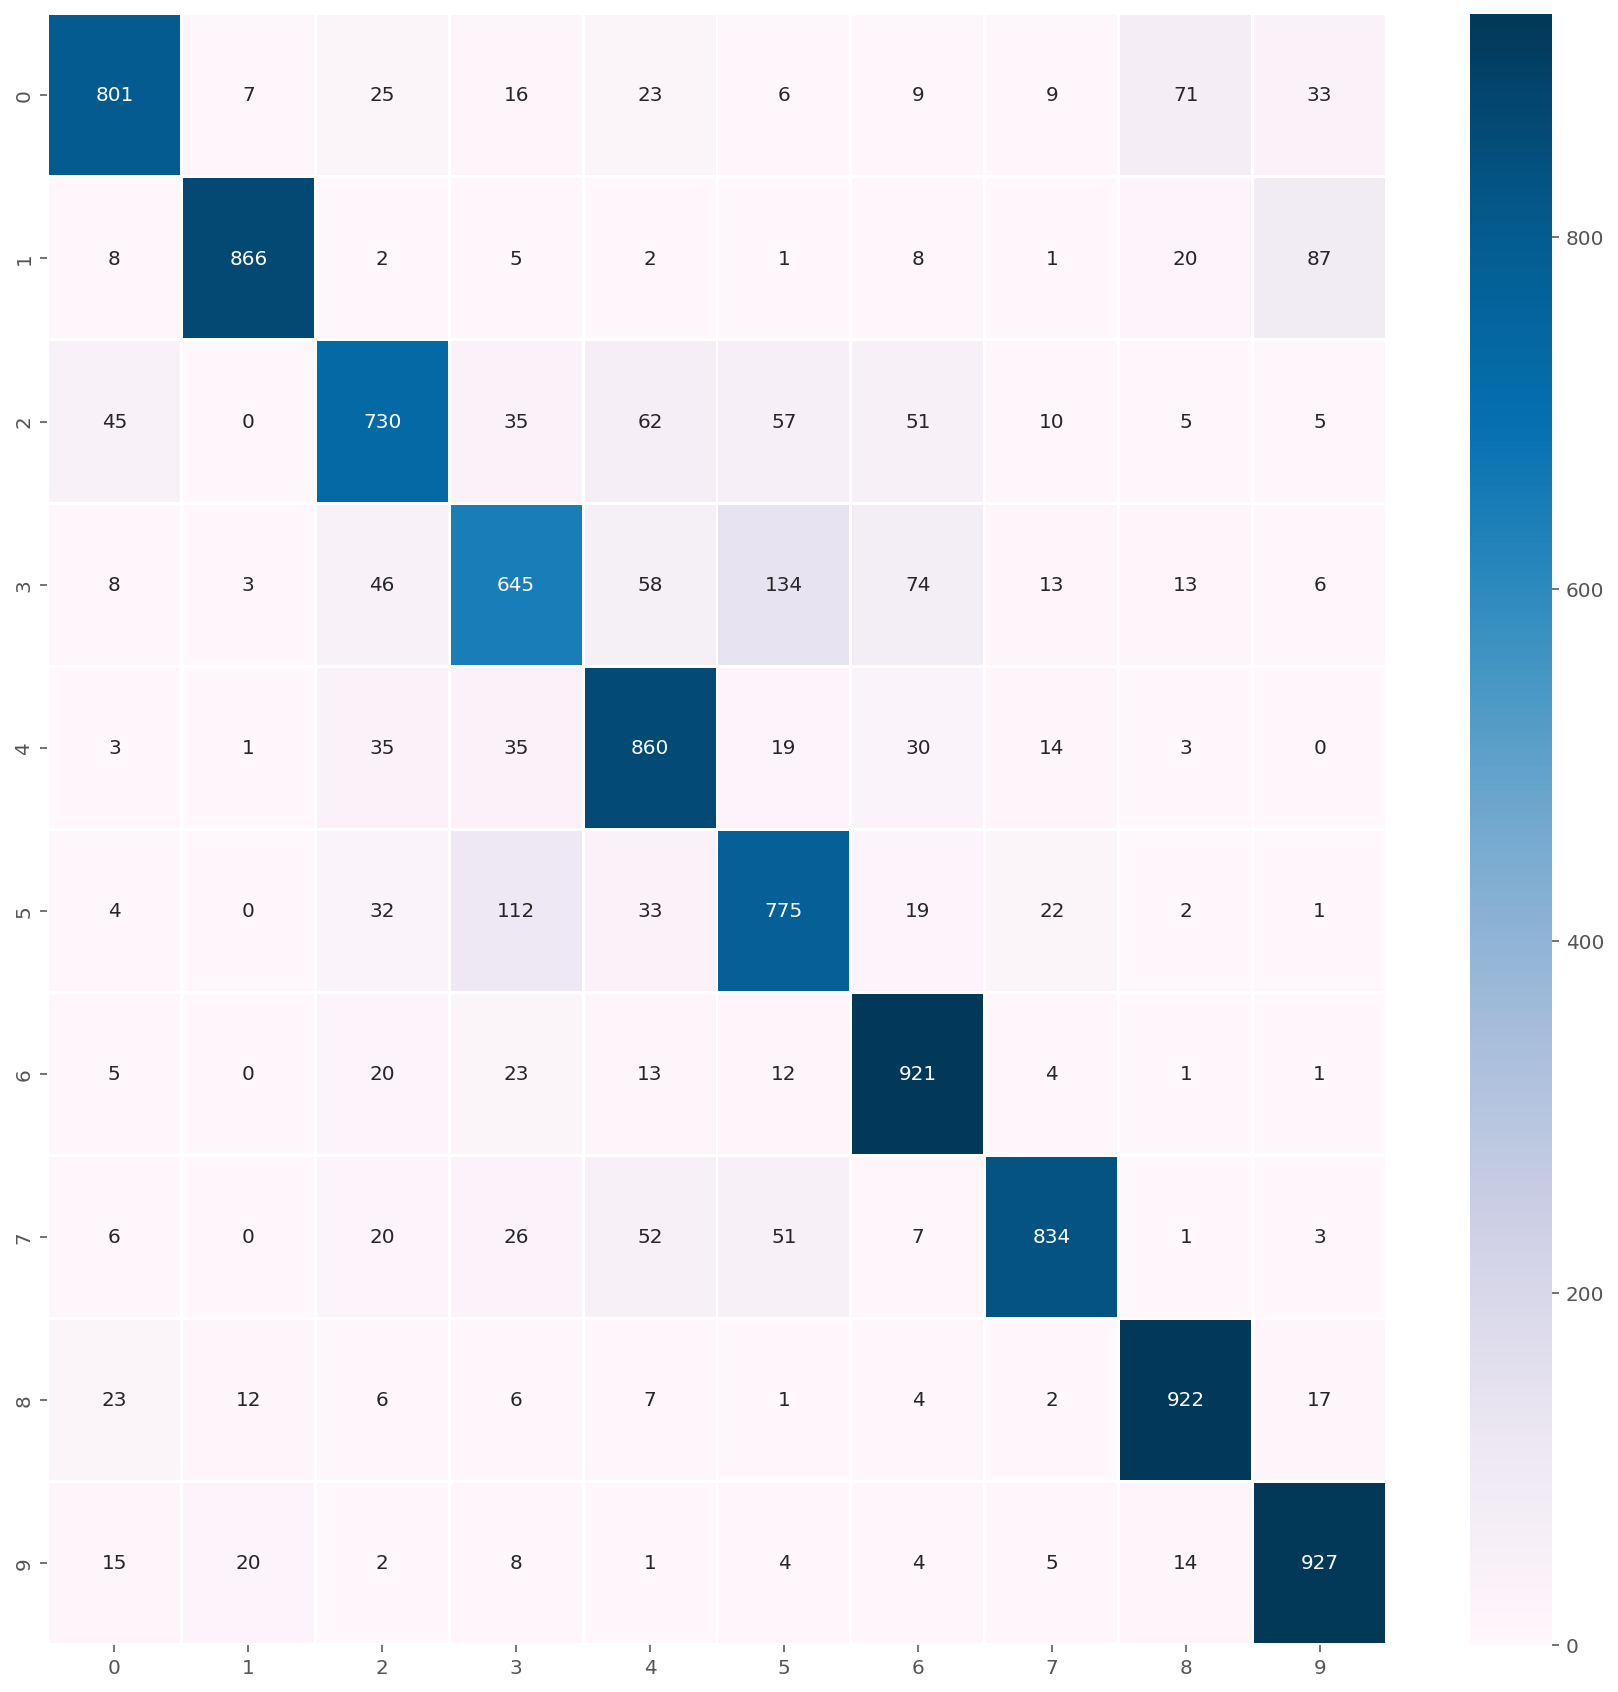

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Printing confusion matrix without label names ')
import seaborn as sns
plt.figure(figsize=(15,15))
cf_matrix = confusion_matrix(testyConverted, output)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g',cmap="PuBu" )

Saved confusion matrix to disk


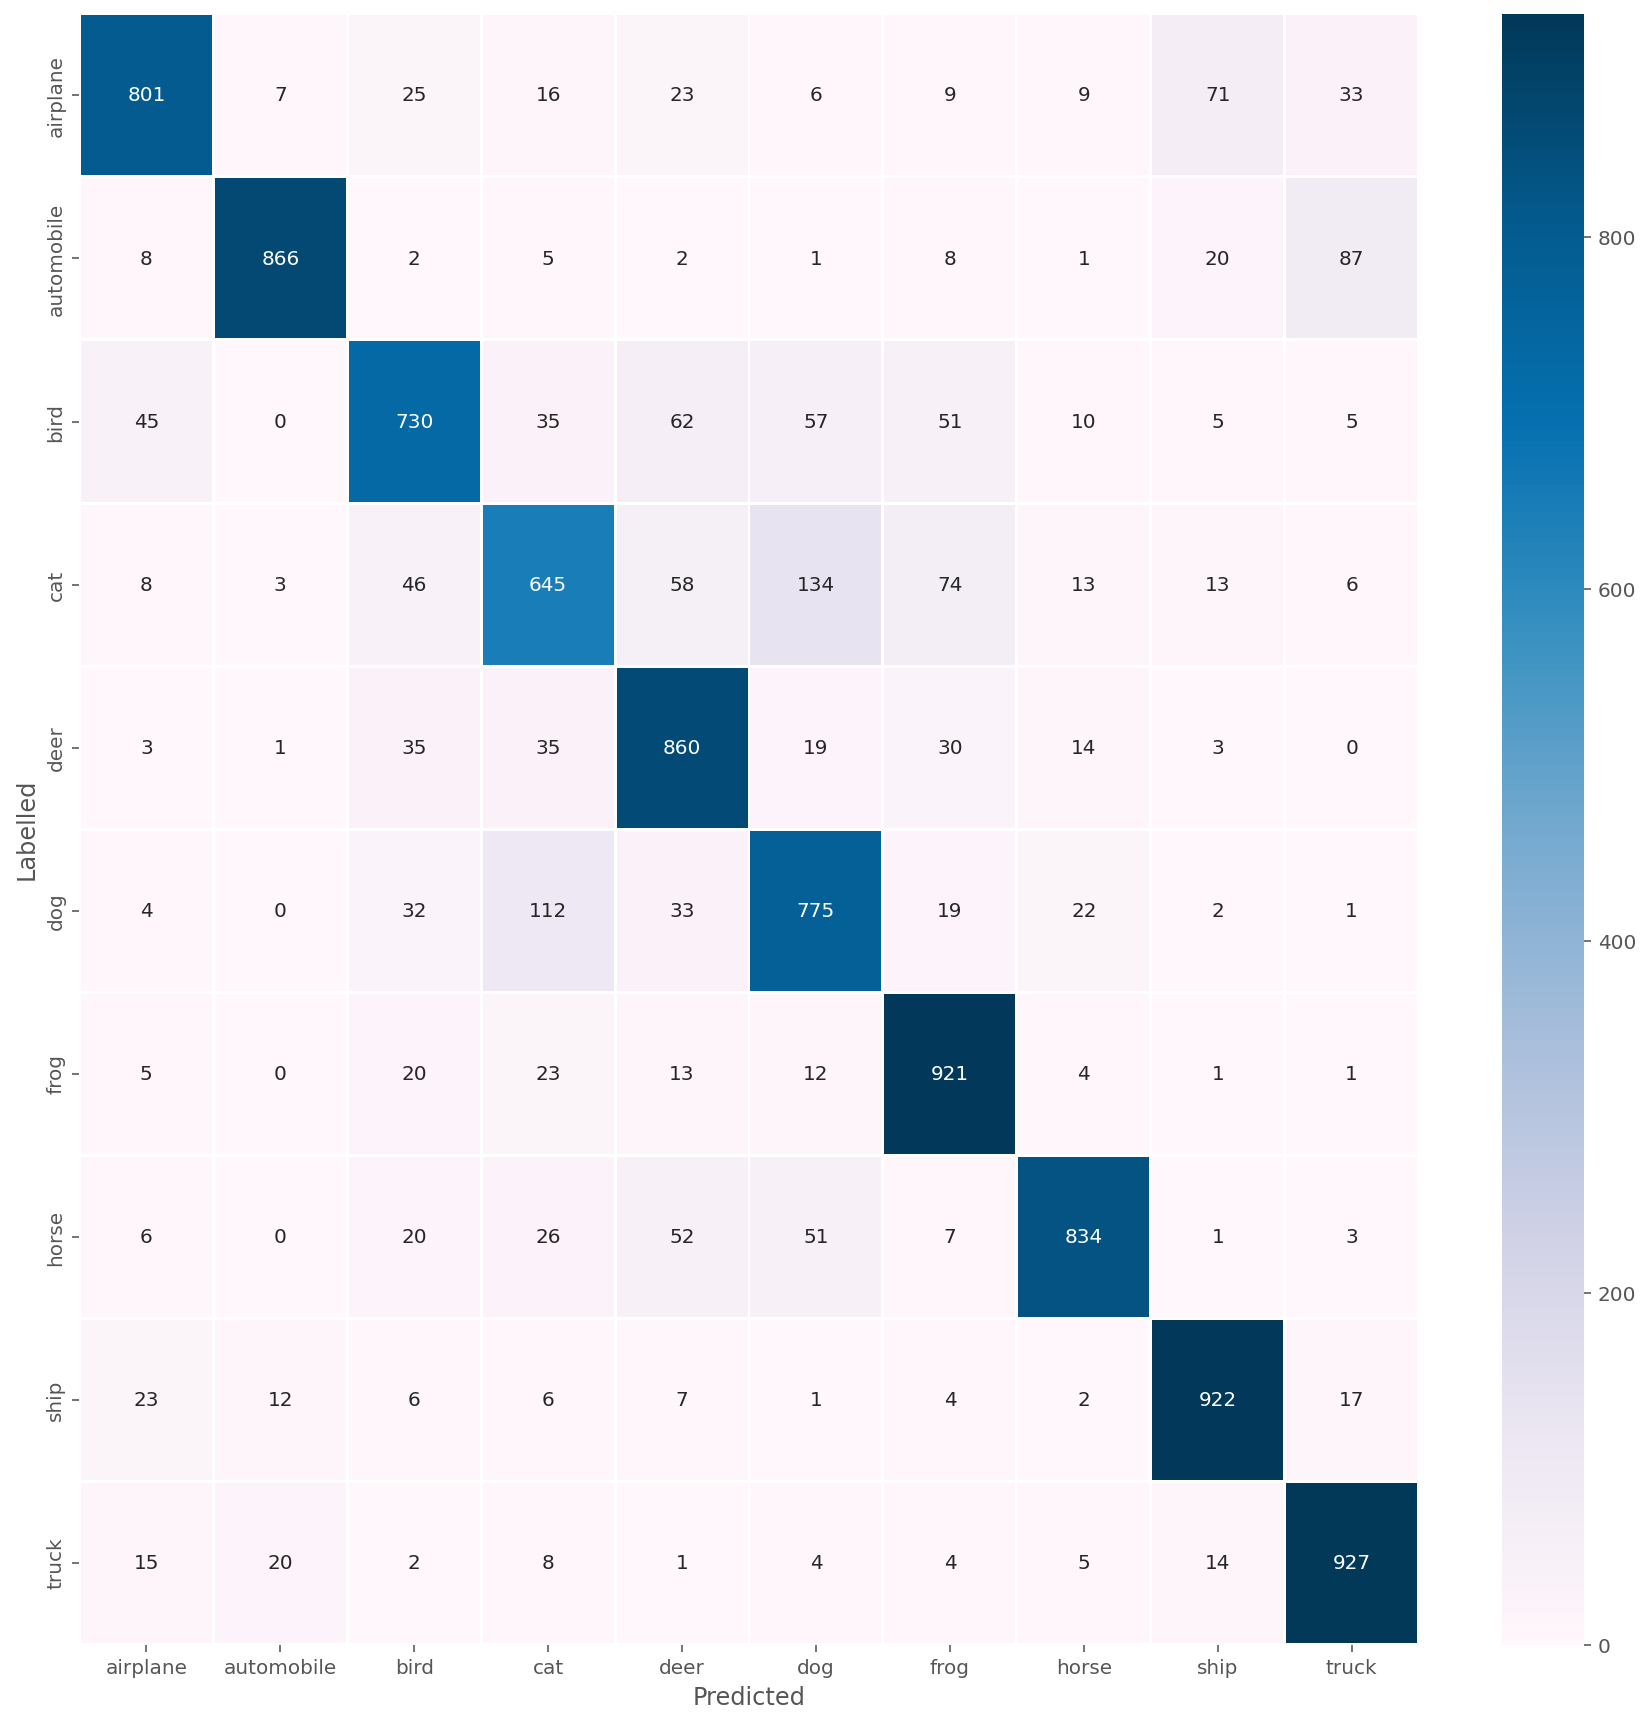

In [ ]:
#try refer to this article https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c 

# figure
fig, ax = plt.subplots(figsize=(15, 15))


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
##output = predicted 
##testY = label

cf_matrix = confusion_matrix(testyConverted, output)
xticks_labels = load_label_names() 
yticks_labels = load_label_names()
p = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels =xticks_labels, yticklabels = yticks_labels, cmap="PuBu" )

#x=predicted
#y=label 

plt.xlabel('Predicted')
plt.ylabel('Labelled')

#plt.xticks(np.arange(12) + .5, labels=xticks_labels)
#plt.xticks(  labels=xticks_labels)
import time

nowTimeStampYYYYMMDDHHMMSS = time.strftime("%Y%m%d"+'_'+ "%H%M%S" )
plt.savefig('ModelA_'+nowTimeStampYYYYMMDDHHMMSS+'_confusionMatrix_.png')



print("Saved confusion matrix to disk")


In [ ]:
import time

nowTimeStampYYYYMMDDHHMMSS = time.strftime("%Y%m%d"+'_'+ "%H%M%S" )
plt.savefig('ModelA_'+nowTimeStampYYYYMMDDHHMMSS+'_confusionMatrix_.png')



print("Saved confusion matrix to disk")

Saved confusion matrix to disk


<Figure size 432x288 with 0 Axes>

## End Getting Confusion Matrix 

## (Optional) Getting a picture in the middle & heatmap 

We observed that cat has a lot of misclassifications as dog. Let's take a look at the feature maps + heatmap to try to find out why

In [ ]:
#we get an index of where the predict and label are not correct 
# predicts = output 
# testyConverted = labels 
ind = np.where(np.equal(output, testyConverted)==0)


In [ ]:
len(ind[0])

1719

In [ ]:
allWrongPredictins = ind[0]
print (allWrongPredictins.ndim) 
print ('There are ', len(allWrongPredictins),'wrong predictions')

1
There are  1719 wrong predictions


In [ ]:
# adopted from FRancios book 


In [ ]:
##We try to get an index where ttruelabel = cat but has predict as something else 

In [ ]:
##CATS 2

In [ ]:
labelNames = load_label_names()
#cat_index = 3 

In [ ]:
#CATS 2 

#testyConverted=labels
b=0
index_Of_label_to_check = 3 
# cat => index 3 

allCats_Wrong_Ind= [] 

for i in range (len(testyConverted)):
    #print (i)
    if (testyConverted[i]==index_Of_label_to_check and output[i]!=index_Of_label_to_check ):
        #print (b) 
        b=b+1
        allCats_Wrong_Ind.append(i)

print ('There are ',b, ' wrong predictions for', labelNames [ index_Of_label_to_check ] ) 
#print (len(testyConverted))
#print (len(output))

There are  355  wrong predictions for cat


In [ ]:
#for i in allCats_Wrong_Ind:
#  print(i)

allCats_Wrong_Ind_arr = np.array ( allCats_Wrong_Ind )


In [ ]:
#print out the array 

#allCats_Wrong_Ind_arr

In [ ]:
#francois 

In [ ]:
#testyConverted=labels
b=0
index_Of_label_to_check = 3 
# cat => index 3 

allCats_Correct_Ind= [] 

for i in range (len(testyConverted)):
    #print (i)
    if (testyConverted[i]==index_Of_label_to_check and output[i]==index_Of_label_to_check ):
        #print (b) 
        b=b+1
        allCats_Correct_Ind.append(i)

print ('There are ',b, ' right predictions for', labelNames [ index_Of_label_to_check ] ) 
#print (len(testyConverted))
#print (len(output))

There are  645  right predictions for cat


In [ ]:
#allCats_Correct_Ind

In [ ]:
sample_correct_cat_index = allCats_Correct_Ind[35]  ##was 1 

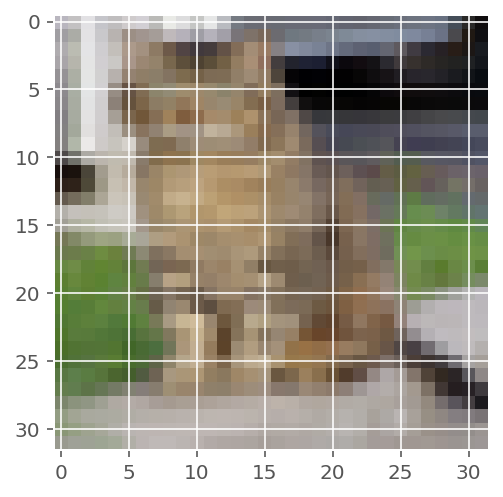

In [ ]:
#since each run is different, we may get a different "correct" cat index 
img_tensor = testX [allCats_Correct_Ind[sample_correct_cat_index ]]
plt.imshow(img_tensor)
plt.show()

In [ ]:
img_tensor.shape

(32, 32, 3)

In [ ]:
img_tensor_expanded = np.expand_dims(img_tensor, axis=0)
img_tensor_expanded.shape

(1, 32, 32, 3)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
#from FRancois book
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor_expanded) 

(1, 32, 32, 32)


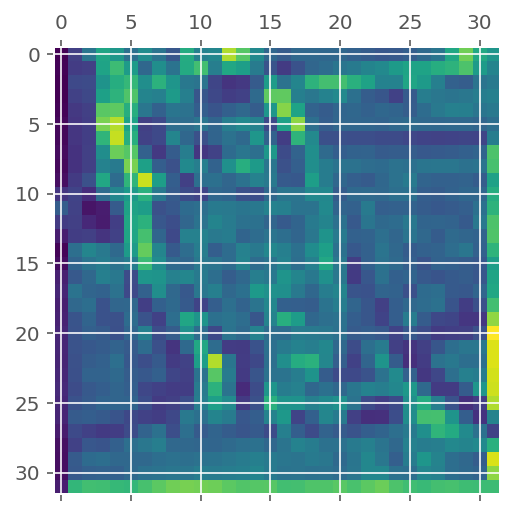

In [ ]:
#show first layer activation 
first_layer_activation = activations[0]
print(first_layer_activation.shape)


plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

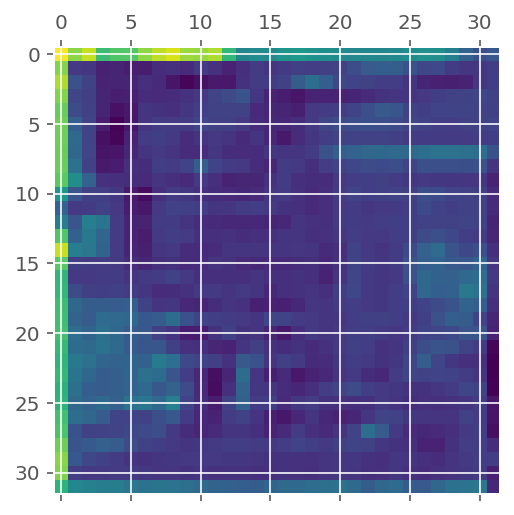

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

## Every channel of first 8 layer activation on the test picture
## Show these for first 8 layers 
From [Deep Learning with Python (Francois Chollet)]: As you go higher, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as “cat ear” and “cat eye.” Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.





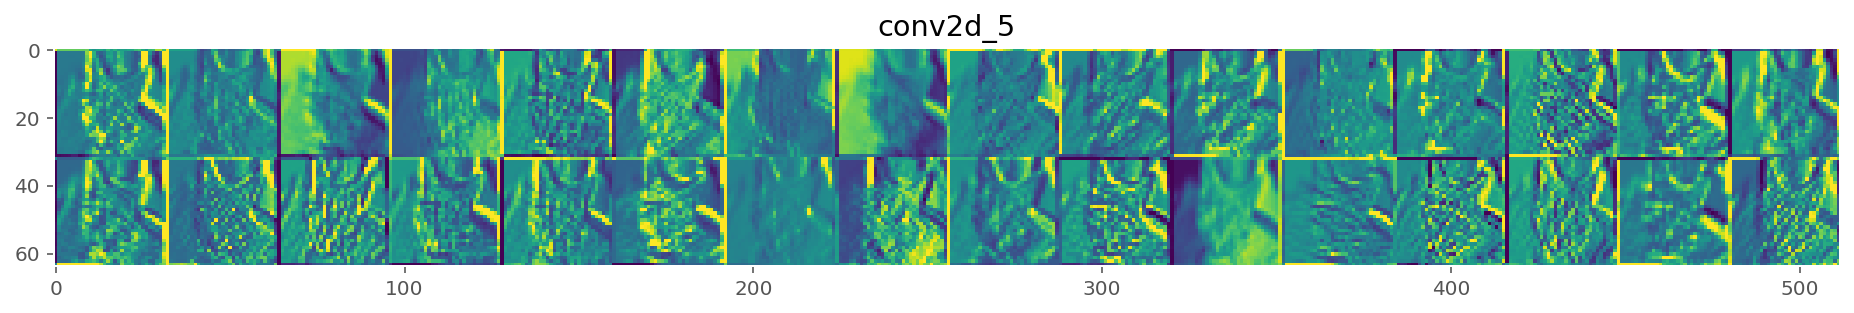

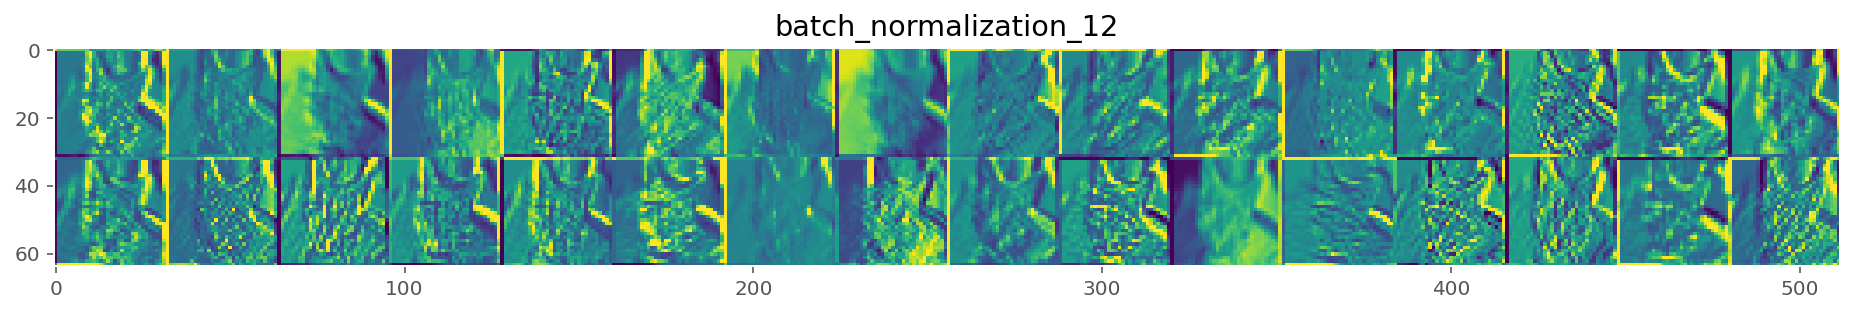

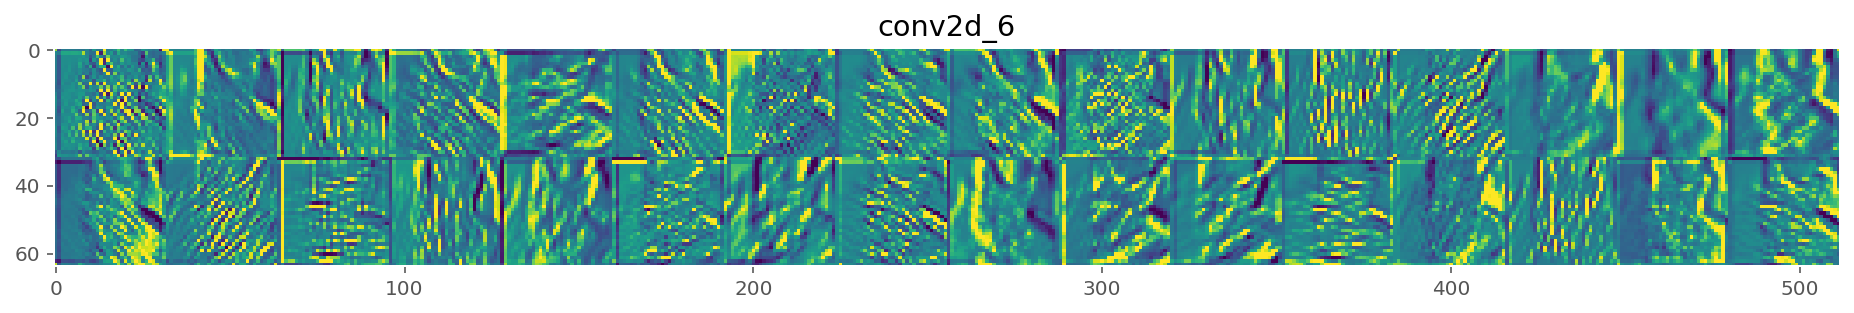

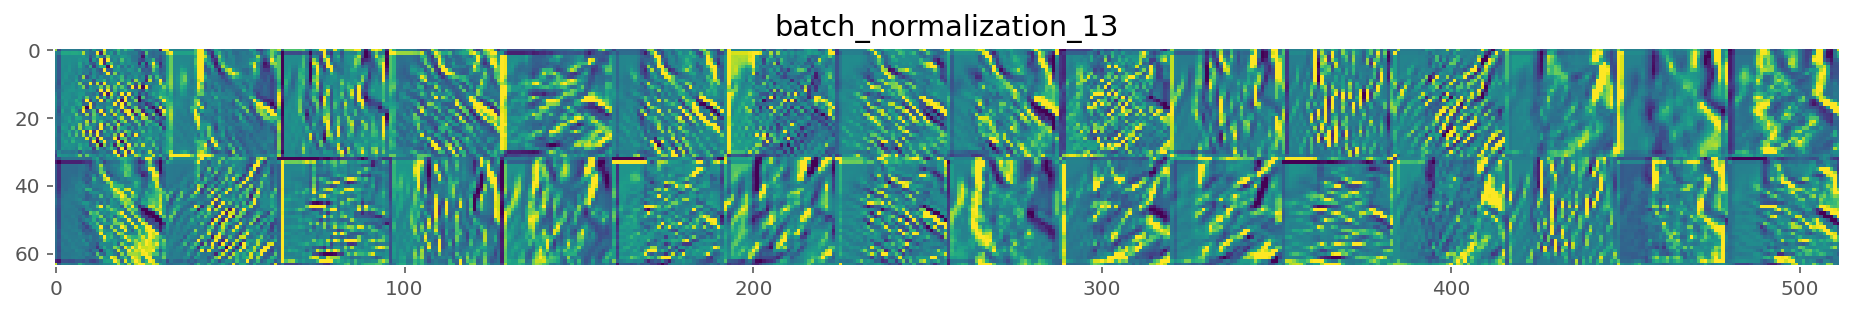

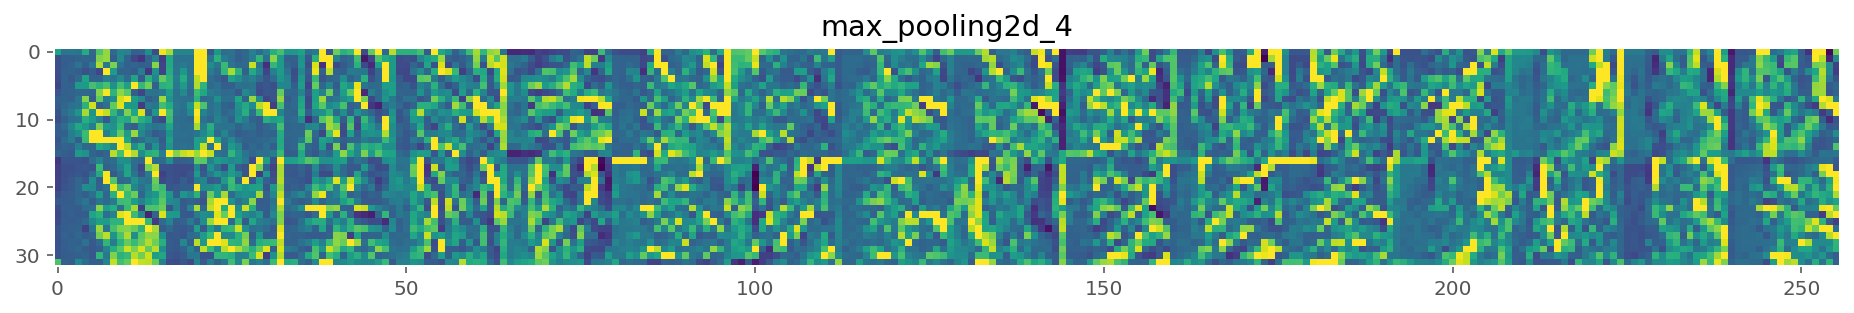

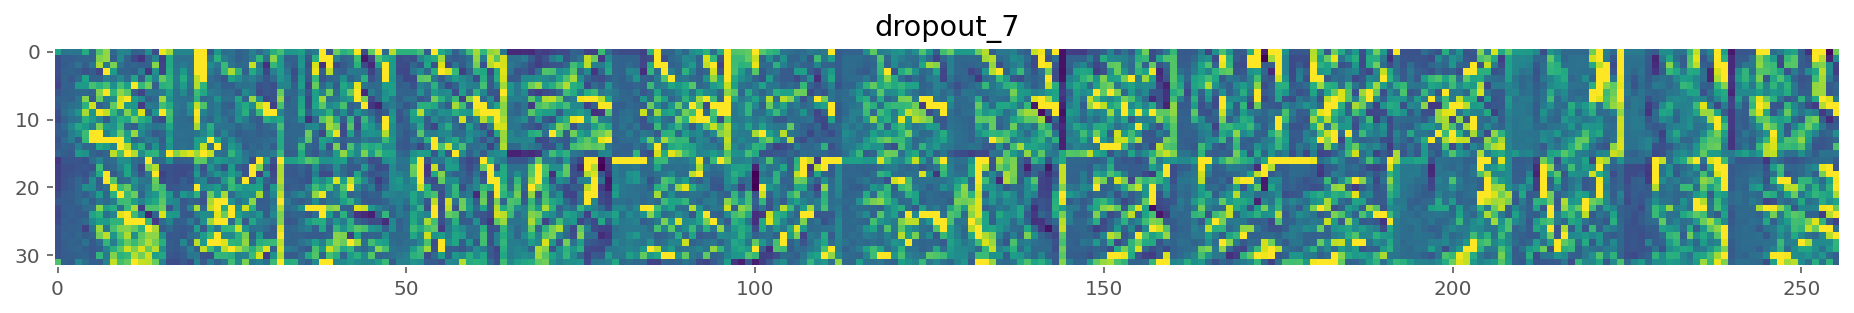

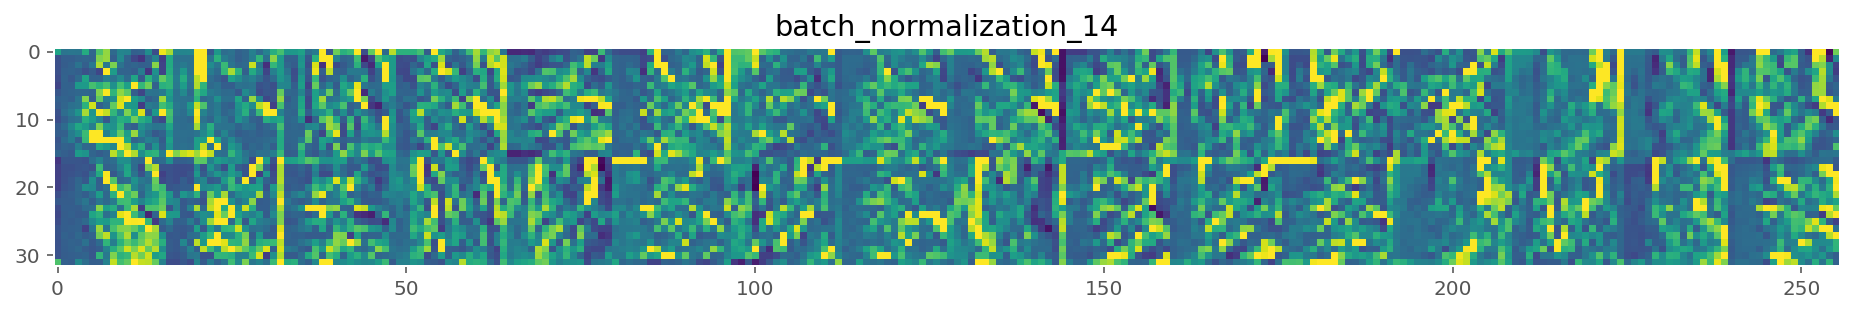

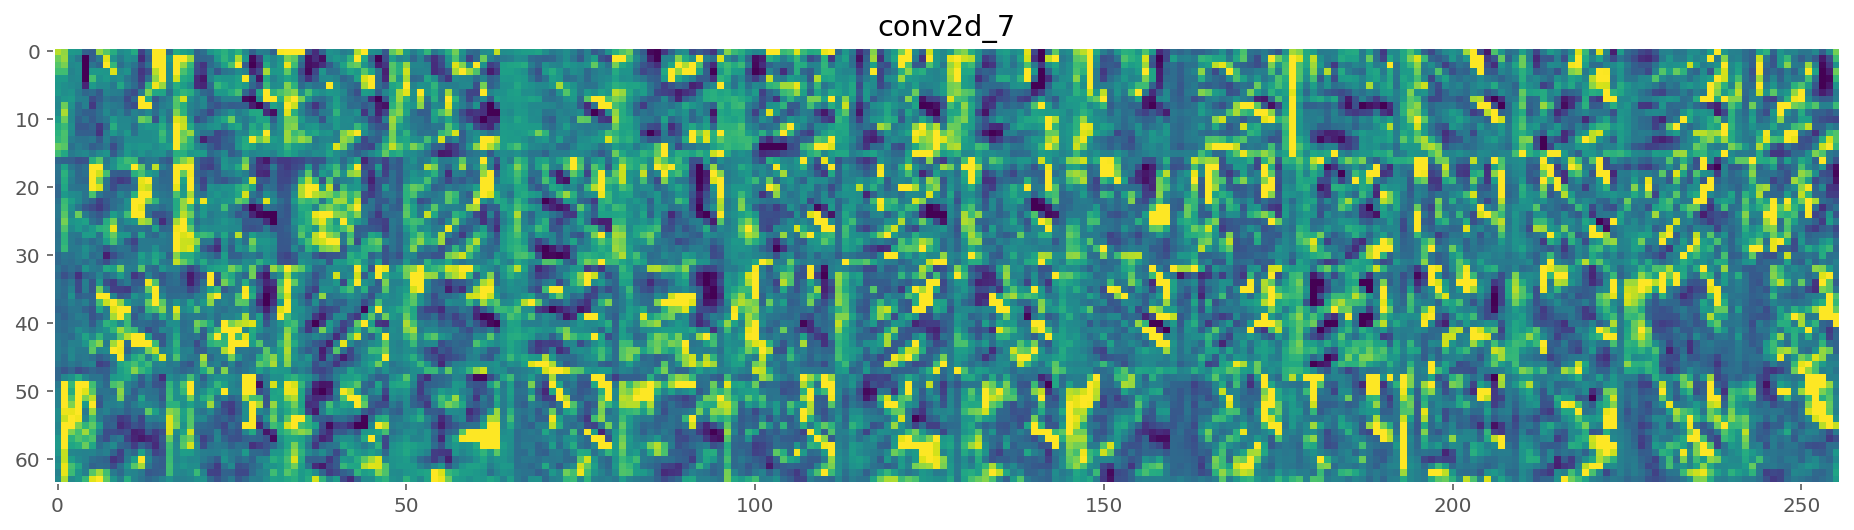

In [ ]:
layer_names = []                                                         
for layer in model.layers[:8]:                                            
    layer_names.append(layer.name)                                        

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):        
    n_features = layer_activation.shape[-1]                               

    size = layer_activation.shape[1]                                      

    n_cols = n_features // images_per_row                                 
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):                                             
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()                         
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,                   
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    #plt.savefig('Cat_FIRST_8_Layers_'+layer_name+'.png')
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.savefig('Cat_FIRST_8_Layers_'+layer_name+'.png')

In [ ]:
## heatmap I 

In [ ]:
def deprocess_image(x):
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x  

In [ ]:
x = img_tensor_expanded

## Optional: See a heatmap over the last activation layer - this tells us what the model is using to classify as 'cat'

The base idea is also discussed at '5.4.3. Visualizing heatmaps of class activation' in Deep Learning with Python (Francois Chollet)

This technique is called class activation map (CAM) visualization, and it consists of producing heatmaps of class activation over input images."


adopted from https://keras.io/examples/vision/grad_cam/

In [61]:
import matplotlib.cm as cm

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

In [56]:
#refer to this https://keras.io/examples/vision/grad_cam/ for example to get a heatmap 
# prerequsite : the model must ahve ung_eagarly=true when compiled 

def make_gradcam_heatmap02 (img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # print ('hi there')
    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
#exected 1,32,32,3 - since we have expanded one element 
print (x.shape)

(1, 32, 32, 3)

In [ ]:
# look at the model summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [60]:
from IPython.display import Image, display

[[2.4006863e-06 4.5811799e-08 6.2870029e-05 9.6431303e-01 3.6821195e-05
  9.3039009e-04 3.4641270e-02 9.6531166e-06 7.7966899e-07 2.7309547e-06]]
hi there


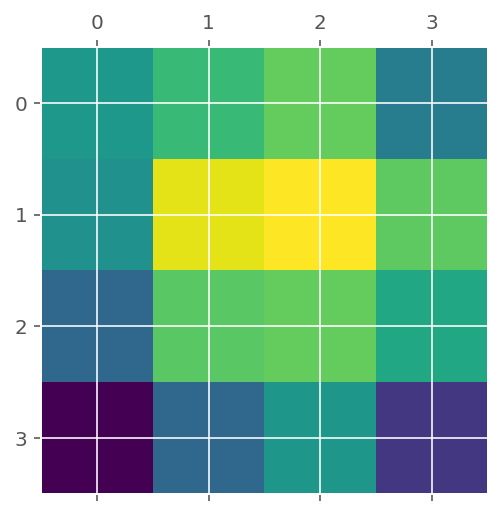

In [ ]:
#troubleshoot -- there seems to be a problem if we did not use eagerly=true in the original model 
#https://stackoverflow.com/questions/52357542/attributeerror-tensor-object-has-no-attribute-numpy
#LOOKATHIS

# tf.config.run_functions_eagerly(True) #not working
# try this ... model.compile(..., run_eagerly=True)

#the last_conv_layer_name should be retrieved from the model.summary()

last_conv_layer_name = 'conv2d_9'
img_array = img_tensor_expanded 

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
#print (preds)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap02(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [58]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    ## img = keras.preprocessing.image.load_img(img_path)
    ## img = keras.preprocessing.image.img_to_array(img)
    
    img = img_path * 255 

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    
    # print (img.shape[1])
    # print (img.shape[0])
    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    # display(Image(cam_path))
    plt.imshow(superimposed_img)

32
32


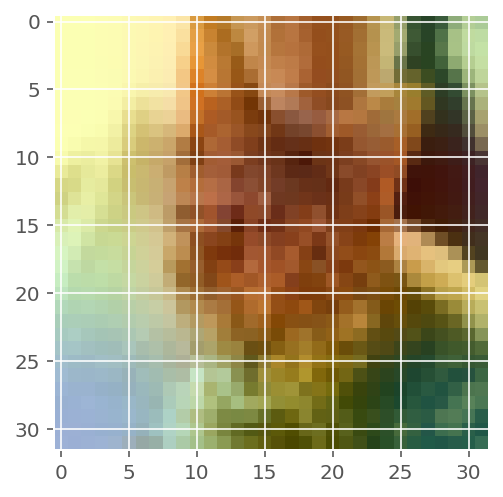

In [ ]:
save_and_display_gradcam(img_tensor, heatmap) #XXX does not matter, cos we are using img_tensor

In [ ]:
##end heatmap I 

In [ ]:
## heatmap II - get a WRONGLY classify as cat and see the heat map 


Predicted  dog
True Label-->  cat


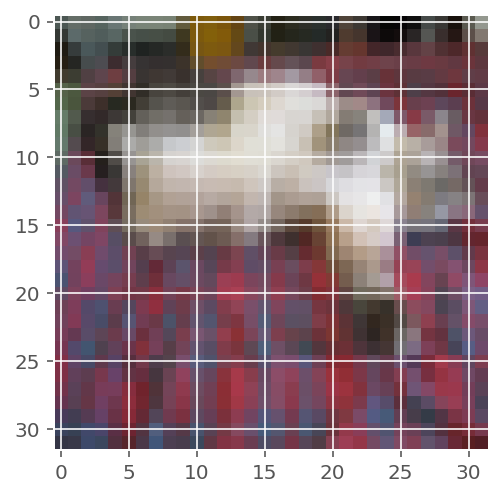

In [ ]:
sample_wrong_classAs_cat_index = allCats_Wrong_Ind_arr[2]

img_tensor_wronglyClassAsCat = testX [ sample_wrong_classAs_cat_index ]

print ('Predicted ', labelNames [ output [ sample_wrong_classAs_cat_index ] ]  )
print ('True Label--> ', labelNames [ testyConverted [ sample_wrong_classAs_cat_index  ] ] )
plt.imshow(img_tensor_wronglyClassAsCat)
plt.show()


In [ ]:
#len(allCats_Wrong_Ind_arr)
# allCats_Wrong_Ind_arr

In [ ]:
#img_tensor_wrongNotAsCat = img_tensor_wronglyClassAsCat
img_tensor_wrongNotAsCat_expanded = np.expand_dims(img_tensor_wronglyClassAsCat, axis=0)
# img_tensor_expanded = np.expand_dims(img_tensor, axis=0)

[[3.8469757e-04 3.0650150e-05 1.9488266e-03 3.7358326e-01 1.7275472e-01
  3.9144686e-01 5.0894450e-02 3.2097106e-03 4.2063530e-05 5.7048239e-03]]
hi there


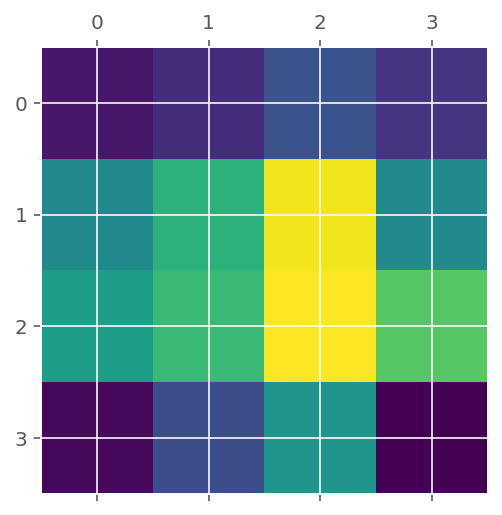

In [ ]:

last_conv_layer_name = 'conv2d_9'
img_array = img_tensor_wrongNotAsCat_expanded 

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print (preds)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap02(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

32
32


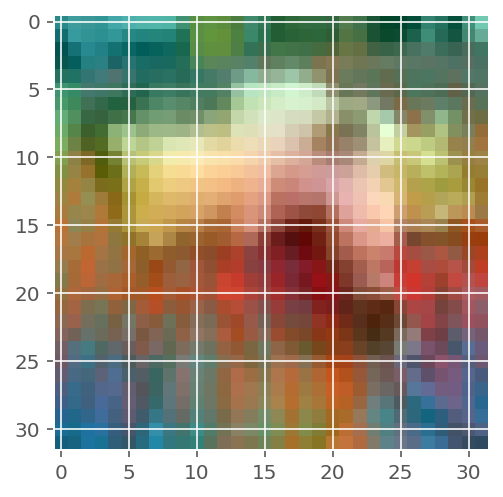

In [ ]:
save_and_display_gradcam(img_tensor_wronglyClassAsCat, heatmap) #XXX does not matter, cos we are using img_tensor

In [ ]:
## heatmap II - get a WRONG classify as cat and see the heat map 

In [53]:
## try to get a heatmap of a correctly identified dog 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

There are  775  right predictions for dog
Predicted  dog
True Label-->  dog


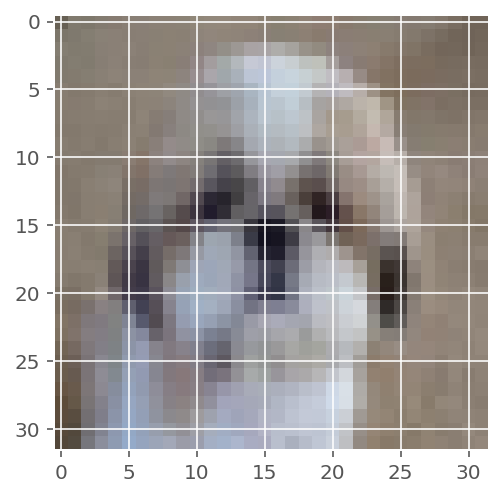

[[2.1050011e-05 1.0710415e-06 3.4371528e-03 2.1032456e-02 5.9515358e-05
  9.7485512e-01 6.6349297e-05 5.2337570e-04 1.2875709e-06 2.4945055e-06]]


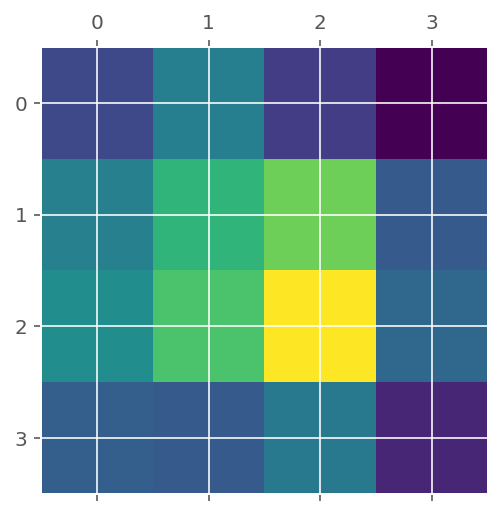

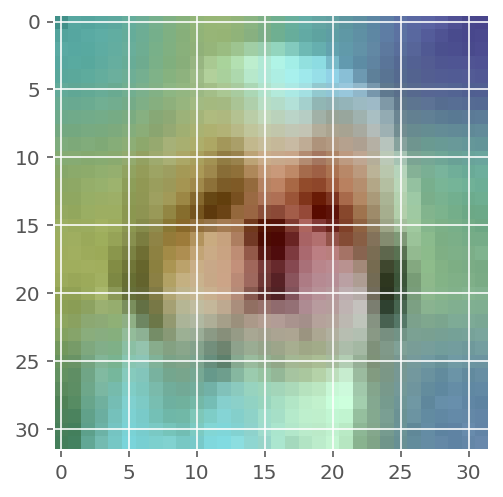

In [65]:
import matplotlib.cm as cm

## (Optional) let's see a correct predicted + label dog heatmap and 
labelNames = load_label_names()

#testyConverted=labels
b=0
index_Of_label_to_check = 5 
# cat => index 3 
# dog => index 5 

allDogs_Correct_Ind= [] 

for i in range (len(testyConverted)):
    #print (i)
    if (testyConverted[i]==index_Of_label_to_check and output[i]==index_Of_label_to_check ):
        #print (b) 
        b=b+1
        allDogs_Correct_Ind.append(i)

print ('There are ',b, ' right predictions for', labelNames [ index_Of_label_to_check ] ) 

allDogs_Correct_Ind_arr = np.array ( allDogs_Correct_Ind )

#choose any number to get a sampleCorrectdog
sample_correctDog_ind = allDogs_Correct_Ind_arr [105]

img_tensor_correctDog = testX [ sample_correctDog_ind ]

print ('Predicted ', labelNames [ output [ sample_correctDog_ind ] ]  )
print ('True Label--> ', labelNames [ testyConverted [ sample_correctDog_ind  ] ] )
plt.imshow(img_tensor_correctDog)
plt.show()

img_tensor_correctDog_expanded = np.expand_dims(img_tensor_correctDog, axis=0)


#gets the last conv2d layer of model loaded / trained - right before flatten 
last_conv_layer_name = 'conv2d_4'
img_array = img_tensor_correctDog_expanded 

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print (preds)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap02(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
save_and_display_gradcam(img_tensor_correctDog, heatmap) #XXX does not matter, cos we are using img_tensor




In [ ]:
## try to get a heatmap of a correctly identified dog 

## Optional : Try out the different bar charts of different predictions
## adopted from kaggle entry 

In [ ]:
#load back the .h5 to speed things up 
model = tf.keras.models.load_model( 'model_20211126_afterBN_epoch60_ESAccuracy_Leaky_Eagerly_fin.h5', custom_objects=None, 
                                   compile=True, options=None )

predict_x = model.predict(testX) 
output = np.argmax(predict_x,axis=1)
#print(output)
testyConverted = np.argmax(testy,axis=1)

In [ ]:
#testyConverted[6]

In [ ]:
 #plt.imshow(testX[0], cmap=plt.cm.binary)

In [ ]:
#testy[0]

In [ ]:
#print ( testyConverted[0] ) 
#print (label_names[ testyConverted[0] ] )

In [ ]:
#output[0]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    labels = load_label_names()
    plt.imshow(img, cmap=plt.cm.binary)
    #corrections to function 
    #predicted_label = np.argmax(predictions_array)
    predicted_label = predictions_array


    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    #print ('[plot_image]] AT', i, '--predicted: ', predicted_label, '--labelled', true_label  )

    #plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
    #           color=color)
    plt.xlabel(f"P:{labels[int(predicted_label)]} - L:({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    #thisplot = plt.bar(range(10), predictions_array, color="#ffffff")
    #set all the height to 1 first 
    thisplot = plt.bar(range(10), 1, color="#ffffff")
    plt.ylim([0, 1])
    predicted_label = predictions_array
    #print ('plot vauearray [predicted_label] AT', i, '--predicted: ', predicted_label, '--labelled', true_label  )


    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    #ax.set_facecolor('white')

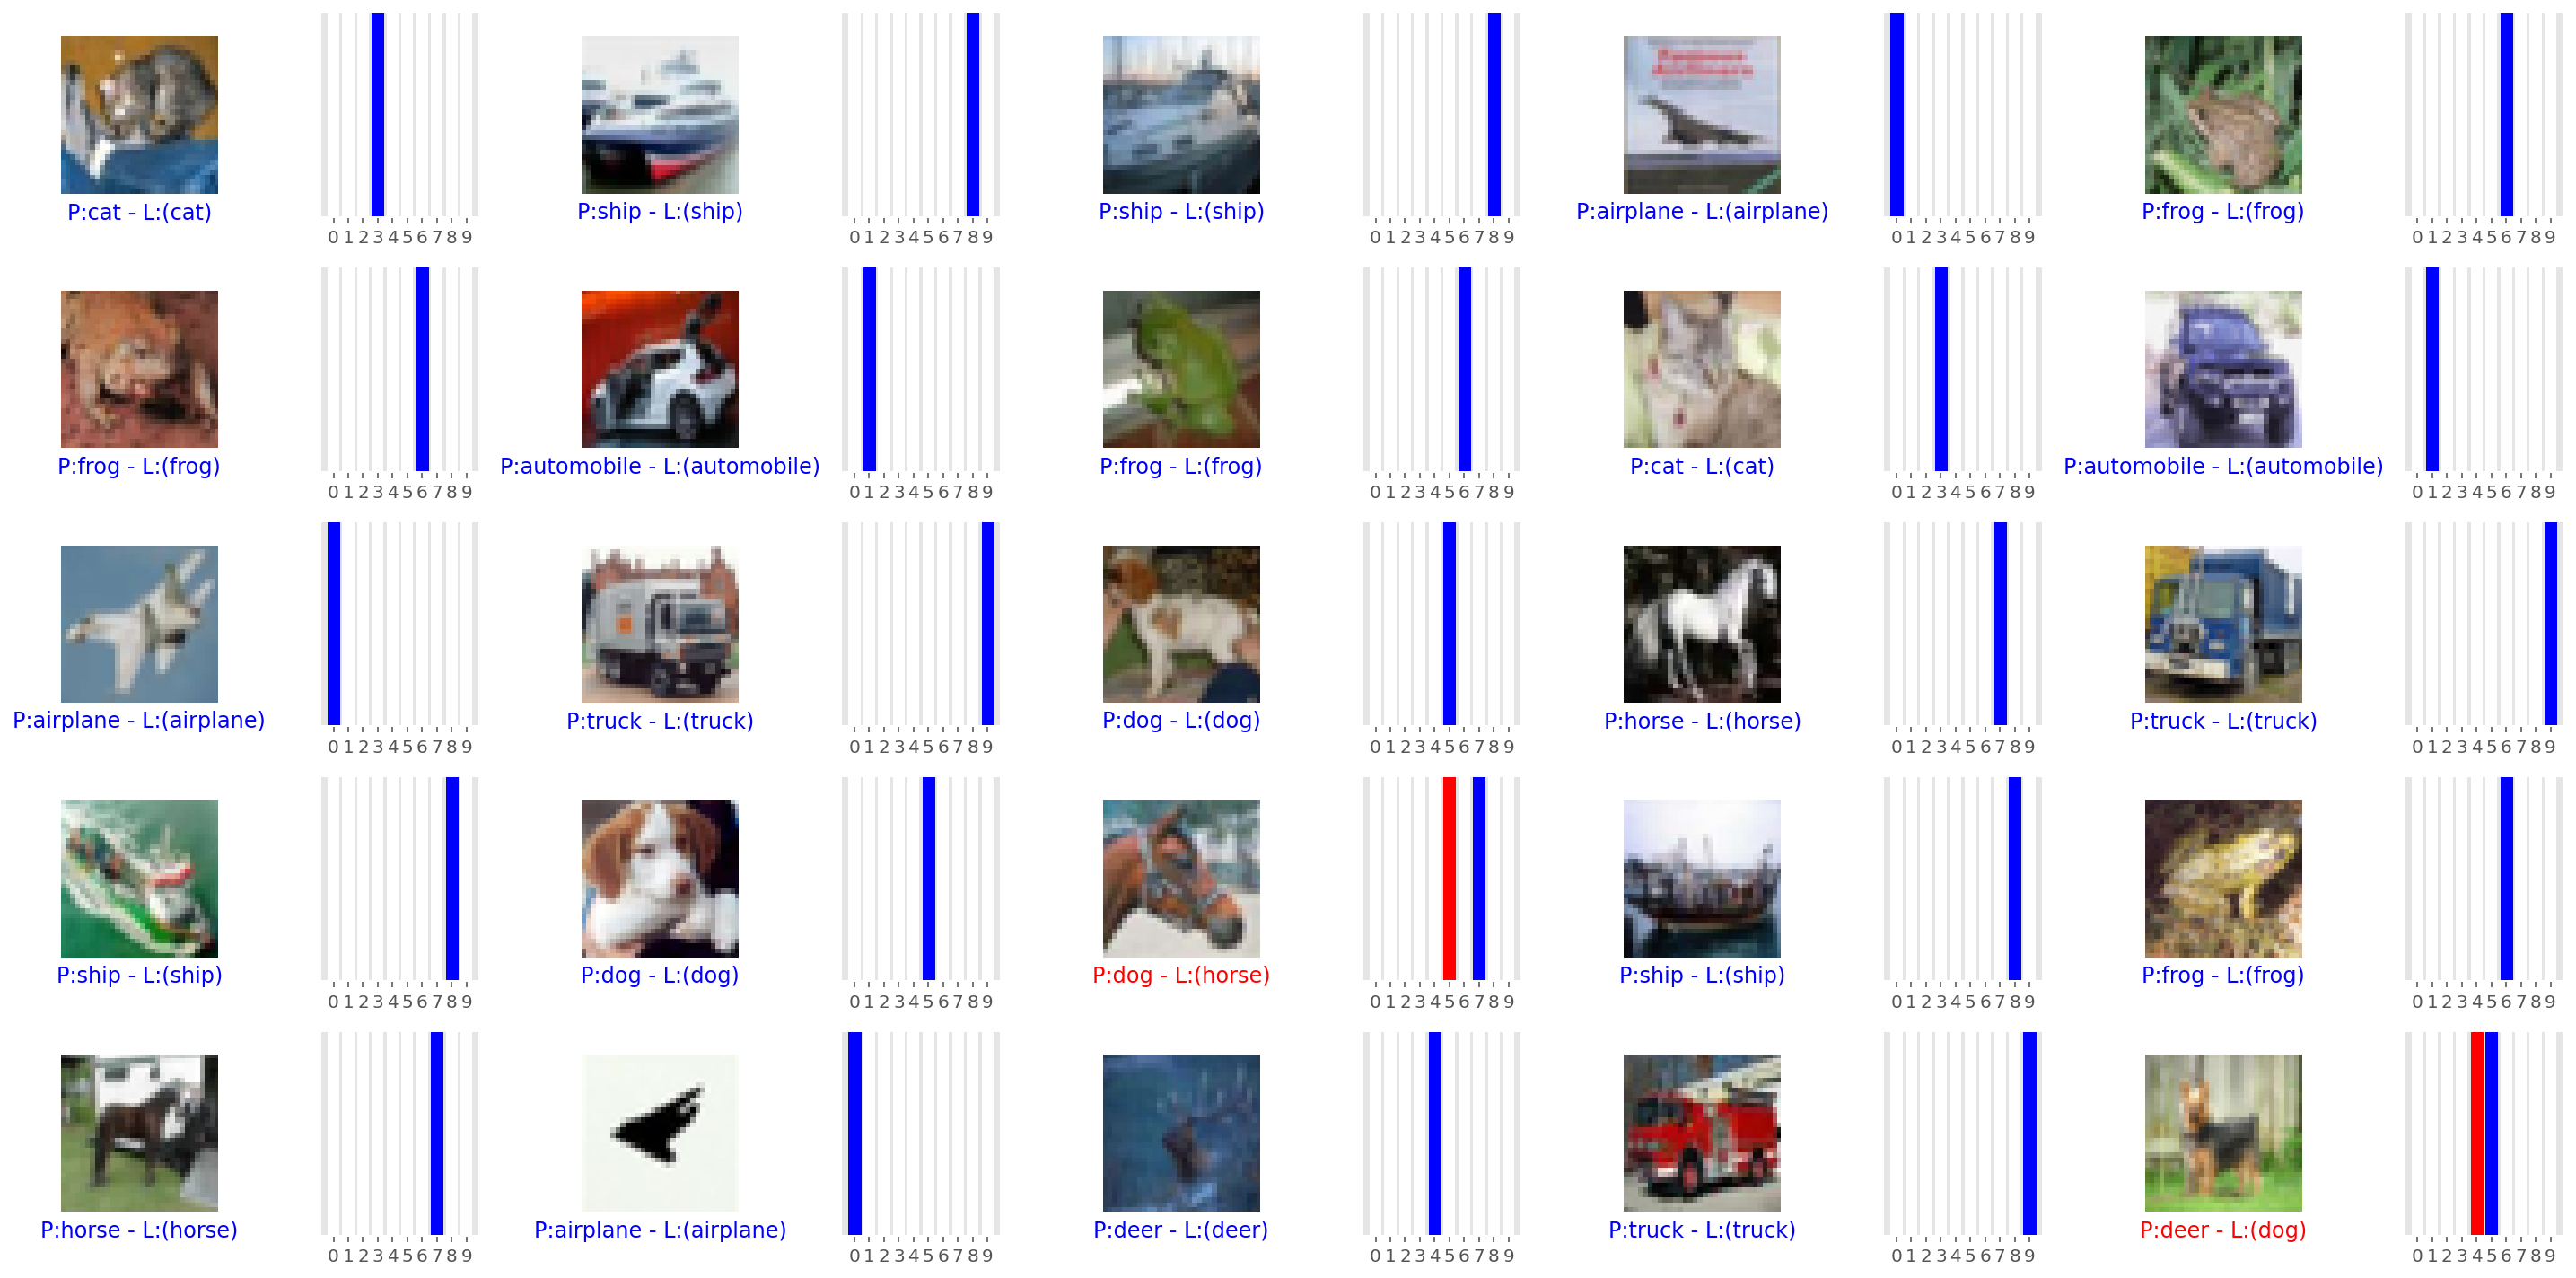

In [ ]:
##kaggle entry [ adopted this chart display from a kaggle entry]
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    #plot_image(i, predictions[i], y_test, X_test)

    plot_image(i, output[i], testyConverted, testX)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    #plot_value_array(i, predictions[i], y_test)
 
    plot_value_array(i, output[i], testyConverted)
plt.tight_layout()

nowTimeStampYYYYMMDDHHMMSS = time.strftime("%Y%m%d"+'_'+ "%H%M%S" )

plt.savefig('Overmap_All'+nowTimeStampYYYYMMDDHHMMSS+'_BarChart_.png')
plt.show()



In [ ]:
#optional, we check distribution of labels in testing dataset 

In [ ]:
def peekIntoTestY():

    labels = testyConverted
    

    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    
    print (label_counts)

    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))


In [ ]:
peekIntoTestY()

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
Label Counts of [0](AIRPLANE) : 1000
Label Counts of [1](AUTOMOBILE) : 1000
Label Counts of [2](BIRD) : 1000
Label Counts of [3](CAT) : 1000
Label Counts of [4](DEER) : 1000
Label Counts of [5](DOG) : 1000
Label Counts of [6](FROG) : 1000
Label Counts of [7](HORSE) : 1000
Label Counts of [8](SHIP) : 1000
Label Counts of [9](TRUCK) : 1000


In [ ]:
#end optional, we check distribution of labels in testing dataset 

## End (Optional) Getting a heatmap 